In [1]:
import xarray as xr 
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd

## Shapefile

In [ ]:
import geopandas as gpd 

shp = gpd.read_file(r"data\shp\BATAS_PROVINSI_DESEMBER_2019_DUKCAPIL.shp")
shp = shp.to_crs("EPSG:4326")

## Extreme Temperature

### Maximum Temperature

In [ ]:
max_temp_path = r"Research\Agroclimate\MaxTemp"

import os 
files = os.listdir(max_temp_path)
files = [rf"{max_temp_path}\{f}" for f in files if f.endswith('.nc')]
files.sort()

In [4]:
max_temp_ds = xr.open_mfdataset(files, combine='by_coords')
max_temp_ds = max_temp_ds.rename({'latitude':'lat', 'longitude':'lon', 'valid_time':'time'})
max_temp_ds['t2m'] = max_temp_ds['t2m'] - 273.15
max_temp_ds = max_temp_ds.drop_vars('number')

In [5]:
max_temp = max_temp_ds['t2m']

In [186]:
from rasterio import features
import affine

def subset_data(data, func, var, new_var, fname):

    # Get bounds and resolution the data
    lat = data['lat'].values
    lon = data['lon'].values
    transform = affine.Affine(
        (lon[1] - lon[0]), 0, lon[0],
        0, (lat[1] - lat[0]), lat[0]
    )
    provinces = shp['PROVINSI'].unique()

    df_list = []

    for i, p in enumerate(provinces): 

        geom = shp[shp['PROVINSI']==p].geometry
        print(f"{i+1:02d} | ■", end="")
        # Create mask from shapefile
        mask = features.geometry_mask(
            geom,
            out_shape=(len(lat), len(lon)),
            transform=transform,
            invert=True
        )      
        print("■", end="")
        # Apply mask to max_temp (broadcast mask to all time steps)
        subset = data.where(mask)
        print("■", end="")
        # calculate mean over lat/lon and ignore NaN values 
        if func == 'max':
            subset = subset.max(['lat', 'lon'], skipna=True)
        elif func == 'min':
            subset = subset.min(['lat', 'lon'], skipna=True)
        else:
            subset = subset.mean(['lat', 'lon'], skipna=True)
        print("■", end="")
        # convert to pandas dataframe
        df = subset.to_dataframe().reset_index()
        df['province'] = p 
        df = df.rename(columns={var:new_var})
        print("■", end="")
        # save to csv
        df_list.append(df)
        print(f"■ | {p}")
    
    
    df = pd.concat(df_list, axis=0)

    df['year'] = df['time'].apply(lambda x: x.year)
    df.sort_values('time')
    df.to_csv(fr"{fname}.csv", index=False)
    return df    

In [ ]:
max_temp_data = subset_data(max_temp, 'max', 't2m', 'max_temp', 'temp_max')

01 | ■■■■■■ | ACEH
02 | ■■■■■■ | BALI
03 | ■■■■■■ | BANTEN
04 | ■■■■■■ | BENGKULU
05 | ■■■■■■ | DAERAH ISTIMEWA YOGYAKARTA
06 | ■■■■■■ | DKI JAKARTA
07 | ■■■■■■ | GORONTALO
08 | ■■■■■■ | JAMBI
09 | ■■■■■■ | JAWA BARAT
10 | ■■■■■■ | JAWA TENGAH
11 | ■■■■■■ | JAWA TIMUR
12 | ■■■■■■ | KALIMANTAN BARAT
13 | ■■■■■■ | KALIMANTAN SELATAN
14 | ■■■■■■ | KALIMANTAN TENGAH
15 | ■■■■■■ | KALIMANTAN TIMUR
16 | ■■■■■■ | KALIMANTAN UTARA
17 | ■■■■■■ | KEPULAUAN BANGKA BELITUNG
18 | ■■■■■■ | KEPULAUAN RIAU
19 | ■■■■■■ | LAMPUNG
20 | ■■■■■■ | MALUKU
21 | ■■■■■■ | MALUKU UTARA
22 | ■■■■■■ | NUSA TENGGARA BARAT
23 | ■■■■■■ | NUSA TENGGARA TIMUR
24 | ■■■■■■ | PAPUA
25 | ■■■■■■ | PAPUA BARAT
26 | ■■■■■■ | RIAU
27 | ■■■■■■ | SULAWESI BARAT
28 | ■■■■■■ | SULAWESI SELATAN
29 | ■■■■■■ | SULAWESI TENGAH
30 | ■■■■■■ | SULAWESI TENGGARA
31 | ■■■■■■ | SULAWESI UTARA
32 | ■■■■■■ | SUMATERA BARAT
33 | ■■■■■■ | SUMATERA SELATAN
34 | ■■■■■■ | SUMATERA UTARA


In [18]:
max_temp_data['max_temp'].max()

49.766510009765625

### Minimum Temperature

In [ ]:
min_temp_path = r"Research\Agroclimate\MinTemp"

import os 
files = os.listdir(min_temp_path)
files = [rf"{min_temp_path}\{f}" for f in files if f.endswith('.nc')]
files.sort()

min_temp_ds = xr.open_mfdataset(files, combine='by_coords')
min_temp_ds = min_temp_ds.rename({'latitude':'lat', 'longitude':'lon', 'valid_time':'time'})
min_temp_ds['t2m'] = min_temp_ds['t2m'] - 273.15
min_temp_ds = min_temp_ds.drop_vars('number')

In [20]:
min_temp = min_temp_ds['t2m']

In [ ]:
min_temp_data = subset_data(min_temp, min, 't2m', 'min_temp', 'Temperature_Min_Daily_1995-2024')

01 | ■■■■■■ | ACEH
02 | ■■■■■■ | BALI
03 | ■■■■■■ | BANTEN
04 | ■■■■■■ | BENGKULU
05 | ■■■■■■ | DAERAH ISTIMEWA YOGYAKARTA
06 | ■■■■■■ | DKI JAKARTA
07 | ■■■■■■ | GORONTALO
08 | ■■■■■■ | JAMBI
09 | ■■■■■■ | JAWA BARAT
10 | ■■■■■■ | JAWA TENGAH
11 | ■■■■■■ | JAWA TIMUR
12 | ■■■■■■ | KALIMANTAN BARAT
13 | ■■■■■■ | KALIMANTAN SELATAN
14 | ■■■■■■ | KALIMANTAN TENGAH
15 | ■■■■■■ | KALIMANTAN TIMUR
16 | ■■■■■■ | KALIMANTAN UTARA
17 | ■■■■■■ | KEPULAUAN BANGKA BELITUNG
18 | ■■■■■■ | KEPULAUAN RIAU
19 | ■■■■■■ | LAMPUNG
20 | ■■■■■■ | MALUKU
21 | ■■■■■■ | MALUKU UTARA
22 | ■■■■■■ | NUSA TENGGARA BARAT
23 | ■■■■■■ | NUSA TENGGARA TIMUR
24 | ■■■■■■ | PAPUA
25 | ■■■■■■ | PAPUA BARAT
26 | ■■■■■■ | RIAU
27 | ■■■■■■ | SULAWESI BARAT
28 | ■■■■■■ | SULAWESI SELATAN
29 | ■■■■■■ | SULAWESI TENGAH
30 | ■■■■■■ | SULAWESI TENGGARA
31 | ■■■■■■ | SULAWESI UTARA
32 | ■■■■■■ | SUMATERA BARAT
33 | ■■■■■■ | SUMATERA SELATAN
34 | ■■■■■■ | SUMATERA UTARA


In [ ]:
min_temp_data = pd.read_csv(r"data\hazard\temp_min.csv")
min_temp_data = min_temp_data.rename(columns={'t2m':'min_temp'})
min_temp_data['time'] = pd.to_datetime(min_temp_data['time'])

In [27]:
temp = pd.merge(max_temp_data, min_temp_data, on=['time', 'province', 'year'])
temp = temp.rename(columns={'max_temp':'tmax', 'min_temp':'tmin'})

### Hazard Calculation

In [51]:
def get_stats(df, var):
    # to calculate the yearly statistics for each province
    result = df.groupby('province')[var].max().reset_index(name=f'{var}_max')
    result[f'{var}_mean'] = df.groupby('province')[var].mean().values

    if var != 'heat_stress':
        result[f'{var}_min'] = df.groupby('province')[var].min().values
    return result

def normalization(df, var):

    xmin = df[var].min()
    xmax = df[var].max()

    norm = df[var].apply(lambda x: (x-xmin)/(xmax - xmin))
    return norm

In [ ]:
def calculate_max_temp(df, var1='tmax', var2='tmin'):


    # maximum temperature
    tmax = df[[col for col in df.columns if col != 'time']].copy()
    tmax = tmax.groupby(['year', 'province'])[var1].max().reset_index(name=var1)

    tmax_data = get_stats(tmax, var1)

    # heat stress
    heat_stress = df.copy()
    threshold = np.percentile(heat_stress[var1], 90)
    heat_stress[var1] = heat_stress[var1].apply(lambda x: 1 if x >= threshold else 0)
    heat_stress = heat_stress.groupby(['province', 'year'])[var1].sum().reset_index(name='heat_stress')

    heat_stress_data = get_stats(heat_stress, 'heat_stress')

    # minimum temperature 
    tmin = df[[col for col in df.columns if col != 'time']].copy()
    tmin = tmin.groupby(['year', 'province'])[var2].min().reset_index(name=var2)

    tmin_data = get_stats(tmin, var2)

    # monthly difference temp
    monthly_temp = df[[col for col in df.columns if col != 'year']].copy()
    monthly_temp = monthly_temp.groupby((['province', monthly_temp['time'].dt.to_period('M')])).agg({
        'tmax':'mean',
        'tmin':'mean'
    }).reset_index()

    monthly_temp = monthly_temp.rename(columns={'time': 'month'})
    monthly_temp['month'] = monthly_temp['month'].dt.to_timestamp()
    monthly_temp['year'] = monthly_temp['month'].dt.year
    monthly_temp['tdiff'] = monthly_temp['tmax'] - monthly_temp['tmin']
    monthly_temp_data = get_stats(monthly_temp, 'tdiff')

    # yearly data
    data = pd.merge(tmax, heat_stress, on=['year', 'province']).merge(tmin, on=['year', 'province'])
    # statsitics data
    stats = pd.merge(tmax_data, heat_stress_data, on='province').merge(tmin_data, on=['province']).merge(monthly_temp_data, on=['province'])

    ## normalization
    hazard = stats[["province"] + [col for col in stats.columns if col != 'province']].copy()

    for col in hazard.columns:
        if col != 'province':
            hazard[col] = normalization(hazard, col)

    with pd.ExcelWriter(r"temp.xlsx") as writer:
        df.to_excel(writer, sheet_name='daily', index=False)
        data.to_excel(writer, sheet_name='data', index=False)
        stats.to_excel(writer, sheet_name='stats', index=False)
        hazard.to_excel(writer, sheet_name='hazard', index=False)
        monthly_temp.to_excel(writer, sheet_name='monthly_diff', index=False)
    return data, stats, hazard

In [158]:
temp_data, temp_stats, temp_hazard = calculate_max_temp(temp)

## Rainfall Variability

In [ ]:
prcp_path = [fr"Research\Agroclimate\precipitation\precipitation_{y}.nc" for y in range(1995, 2025)]

prcp_ds = xr.open_mfdataset(prcp_path, combine='by_coords')
prcp_ds = prcp_ds.rename({'latitude':'lat', 'longitude':'lon', 'valid_time':'time'})
prcp_ds['tp'] = prcp_ds['tp'] * 1000 # convert to mm
total_prcp = prcp_ds['tp']

In [ ]:
prcp_data = subset_data(total_prcp, 'max', 'tp', 'tp', 'Precipitation_Max_Daily_1995-2024')

01 | ■■■■■■ | ACEH
02 | ■■■■■■ | BALI
03 | ■■■■■■ | BANTEN
04 | ■■■■■■ | BENGKULU
05 | ■■■■■■ | DAERAH ISTIMEWA YOGYAKARTA
06 | ■■■■■■ | DKI JAKARTA
07 | ■■■■■■ | GORONTALO
08 | ■■■■■■ | JAMBI
09 | ■■■■■■ | JAWA BARAT
10 | ■■■■■■ | JAWA TENGAH
11 | ■■■■■■ | JAWA TIMUR
12 | ■■■■■■ | KALIMANTAN BARAT
13 | ■■■■■■ | KALIMANTAN SELATAN
14 | ■■■■■■ | KALIMANTAN TENGAH
15 | ■■■■■■ | KALIMANTAN TIMUR
16 | ■■■■■■ | KALIMANTAN UTARA
17 | ■■■■■■ | KEPULAUAN BANGKA BELITUNG
18 | ■■■■■■ | KEPULAUAN RIAU
19 | ■■■■■■ | LAMPUNG
20 | ■■■■■■ | MALUKU
21 | ■■■■■■ | MALUKU UTARA
22 | ■■■■■■ | NUSA TENGGARA BARAT
23 | ■■■■■■ | NUSA TENGGARA TIMUR
24 | ■■■■■■ | PAPUA
25 | ■■■■■■ | PAPUA BARAT
26 | ■■■■■■ | RIAU
27 | ■■■■■■ | SULAWESI BARAT
28 | ■■■■■■ | SULAWESI SELATAN
29 | ■■■■■■ | SULAWESI TENGAH
30 | ■■■■■■ | SULAWESI TENGGARA
31 | ■■■■■■ | SULAWESI UTARA
32 | ■■■■■■ | SUMATERA BARAT
33 | ■■■■■■ | SUMATERA SELATAN
34 | ■■■■■■ | SUMATERA UTARA


In [ ]:
prcp_data = pd.read_csv(r'data\hazard\pr_max.csv')
prcp_data['time'] = pd.to_datetime(prcp_data['time'])
prcp_data.drop(columns=['number'], inplace=True)    

- RX1day Yearly maximum 1-day precipitation mm Examine the extreme rainfall events Direct
- RX5day Yearly maximum consecutive 5-day precipitation mm Examine the - - extreme rainfall events Direct
- prcptot Mean yearly total precipitation in wet days with precipitation >= 1 mmmm Tendency of annual rainfall Direct
- CDD Yearly maximum number of consecutive days with  precipitation <1 mm days Tendency of dry conditions Direct
- CWD Yearly maximum number of consecutive days with precipitation >=1 mmdays Tendency of wet conditions Direct

In [ ]:
def calculate_precipitation_hazard(df):
    # Calculate RX1, RX5, Annual Rainfall, Dry Days, and Wet Days
    
    # df is a dataframe with time, tp, and province columns 
    df['year'] = df['time'].dt.year

    # calculate RX1
    rx1 = df.copy()
    rx1 = rx1[['year', 'province', 'tp']].groupby(['year', 'province']).max().reset_index().rename(columns={'tp':'rx1'})
    stats_rx1 = get_stats(rx1, 'rx1')

    # calculate RX5
    rx5 = df.sort_values(['province','time']).copy()
    rx5['rx5'] = rx5.groupby(['province'])['tp'].rolling(window=5, min_periods=5).sum().reset_index(level=0, drop=True)
    rx5 = rx5.groupby(['year', 'province'])['rx5'].max().reset_index()
    stats_rx5 = get_stats(rx5, 'rx5')

    stats = pd.merge(stats_rx1, stats_rx5, on='province')
    data = pd.merge(rx1, rx5, on=['year', 'province'])

    # calculate PRCPTOT
    prcptot = df[df['tp']>=1].copy()
    prcptot = prcptot.groupby(['year', 'province'])['tp'].sum().reset_index(name='prcptot')
    stats_prcptot = get_stats(prcptot, 'prcptot')

    data = data.merge(prcptot, on=['year', 'province'])
    stats = stats.merge(stats_prcptot, on='province')

    # calculate CDD
    cdd = df.copy()

    def max_consecutive_dry_days(group):
        # group is a dataframe for a single year and province
        dry = group['tp'] < 1
        # Find lengths of consecutive dry days
        return dry.groupby((dry != dry.shift()).cumsum()).sum().max()

    cdd = (cdd
        .sort_values(['province', 'time'])
        .groupby(['year', 'province'])
        .apply(max_consecutive_dry_days, include_groups=False)
        .reset_index(name='cdd')
    )
    stats_cdd = get_stats(cdd, 'cdd')

    data = data.merge(cdd, on=['year', 'province'])
    stats = stats.merge(stats_cdd, on='province')

    # calculate CWD
    cwd = df.copy()

    def max_consecutive_wet_days(group):
        # group is a dataframe for a single year and province
        dry = group['tp'] > 1
        # Find lengths of consecutive dry days
        return dry.groupby((dry != dry.shift()).cumsum()).sum().max()

    cwd = (cwd
        .sort_values(['province', 'time'])
        .groupby(['year', 'province'])
        .apply(max_consecutive_wet_days, include_groups=False)
        .reset_index(name='cwd')
    )
    stats_cwd = get_stats(cwd, 'cwd')

    data = data.merge(cwd, on=['year', 'province'])
    stats = stats.merge(stats_cwd, on='province')


    ## normalization
    hazard = stats[["province"] + [col for col in stats.columns if 'mean' in col]].copy()
    
    for col in hazard.columns:
        if col != 'province':
            hazard[col] = normalization(hazard, col)


    with pd.ExcelWriter("precip.xlsx") as writer:
        df.to_excel(writer, sheet_name="daily", index=False)
        data.to_excel(writer, sheet_name="data", index=False)
        stats.to_excel(writer, sheet_name="stats", index=False)
        hazard.to_excel(writer, sheet_name="hazard", index=False)
    return data, stats, hazard

In [199]:
prcp_data, prcp_stats, prcp_hazard = calculate_precipitation_hazard(prcp_data)

## Hazard

In [ ]:
hazard = pd.merge(temp_hazard, prcp_hazard, on='province')
cols = [col for col in hazard.columns if 'mean' in col]
hazard = hazard[['province'] + cols]
hazard['H'] = hazard[cols].mean(axis=1)
hazard['H'] = normalization(hazard, 'H')

hazard.to_csv('data\processed\Hazard.csv', index=False)

In [201]:
data = shp.merge(hazard, left_on='PROVINSI', right_on='province')

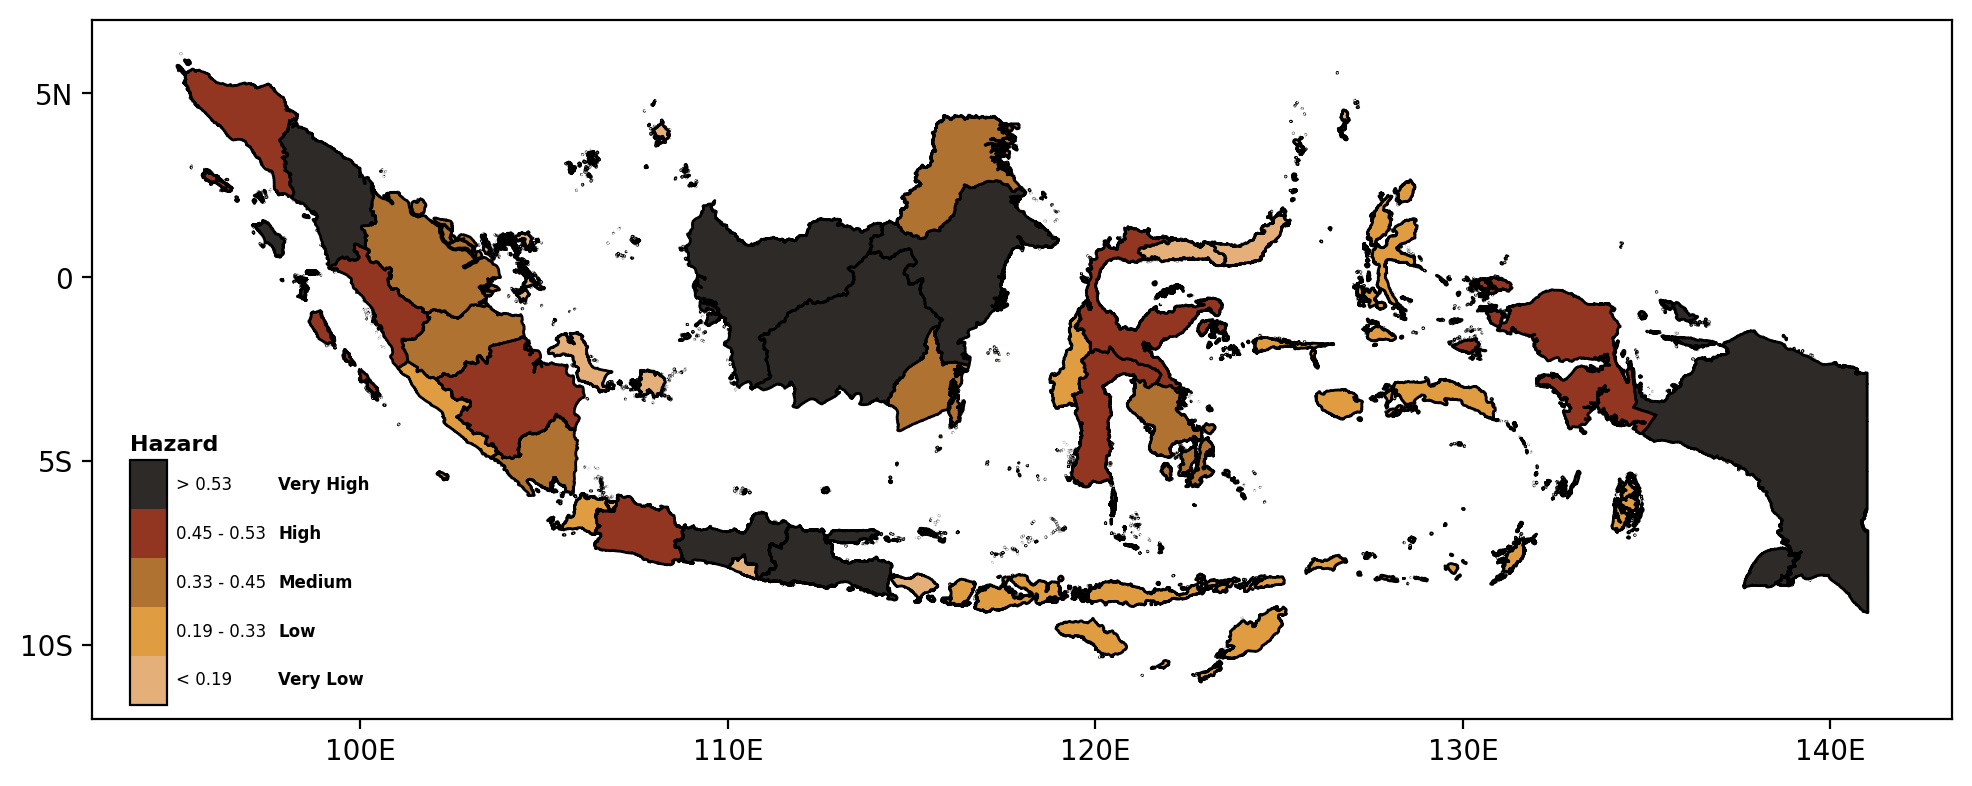

In [ ]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

import matplotlib.colors as mcolors

# Calculate quantiles for 'H'
quantiles = data['H'].quantile([0.2, 0.4, 0.6, 0.8]).values

# Define 5 colors for 5 quantile bins
from pypalettes import load_cmap
cmap = load_cmap("CharlesDemuth")

bounds = [0] + quantiles.tolist() + [1]
norm = mcolors.BoundaryNorm(bounds, cmap.N)

fig, ax = plt.subplots(figsize=(12,6), dpi=200)
data = shp.merge(hazard, left_on='PROVINSI', right_on='province')
im = data.plot(column='H', legend=False, ax=ax, edgecolor='black', linewidth=1, cmap=cmap, norm=norm)

# Create colorbar inside the axes
cax = inset_axes(ax, width="2%", height="35%", loc='lower left', bbox_to_anchor=(0.02, 0.02, 1, 1), bbox_transform=ax.transAxes, borderpad=0)
cb = plt.colorbar(im.collections[0], cax=cax, boundaries=bounds, ticks=bounds, spacing='uniform', orientation='vertical')
cb.set_ticks([])  # Remove default ticks
color_centers = [(bounds[j] + bounds[j+1]) / 2 for j in range(len(bounds)-1)]

# Add labels above each color
labels = ['Very Low', 'Low', 'Medium', 'High', 'Very High']
quantile_text = [f"{f'< {bounds[1]:.2f}':<12.12}", 
                 f"{bounds[1]:.2f} - {bounds[2]:.2f}".ljust(12)[:12],
                 f"{bounds[2]:.2f} - {bounds[3]:.2f}".ljust(12)[:12],
                 f"{bounds[3]:.2f} - {bounds[4]:.2f}".ljust(12)[:12],
                 f"{f'> {bounds[4]:.2f}':<12.12}"]

for i in range(5):
    cax.text(1.25, color_centers[i], rf"{quantile_text[i]}", ha='left', va='center', 
            fontsize=6, transform=cax.transData)
    cax.text(4, color_centers[i], labels[i], ha='left', va='center', 
            fontsize=6, transform=cax.transData, fontweight='bold')
    
cb.ax.tick_params(axis='both', which='both', length=0)

# 
ax.set_ylim([-12, 7])
ax.set_yticks([-10, -5, 0, 5])
ax.set_yticklabels(["10S", "5S", "0", "5N"])
ax.set_xticks([100, 110, 120, 130, 140])
ax.set_xticklabels(["100E", "110E", "120E", "130E", "140E"])
# Set the colorbar title at the top left corner of the colorbar (cax)
cax.set_title('Hazard', fontweight='bold', fontsize=8, ha='left', va='bottom', loc='left', pad=2)
fig.savefig('result\Hazard_Max_PRCP.png', dpi=300, bbox_inches='tight')
plt.show()

### Visualization of Indices

#### Temperature

In [83]:
provinces = shp['PROVINSI'].unique()

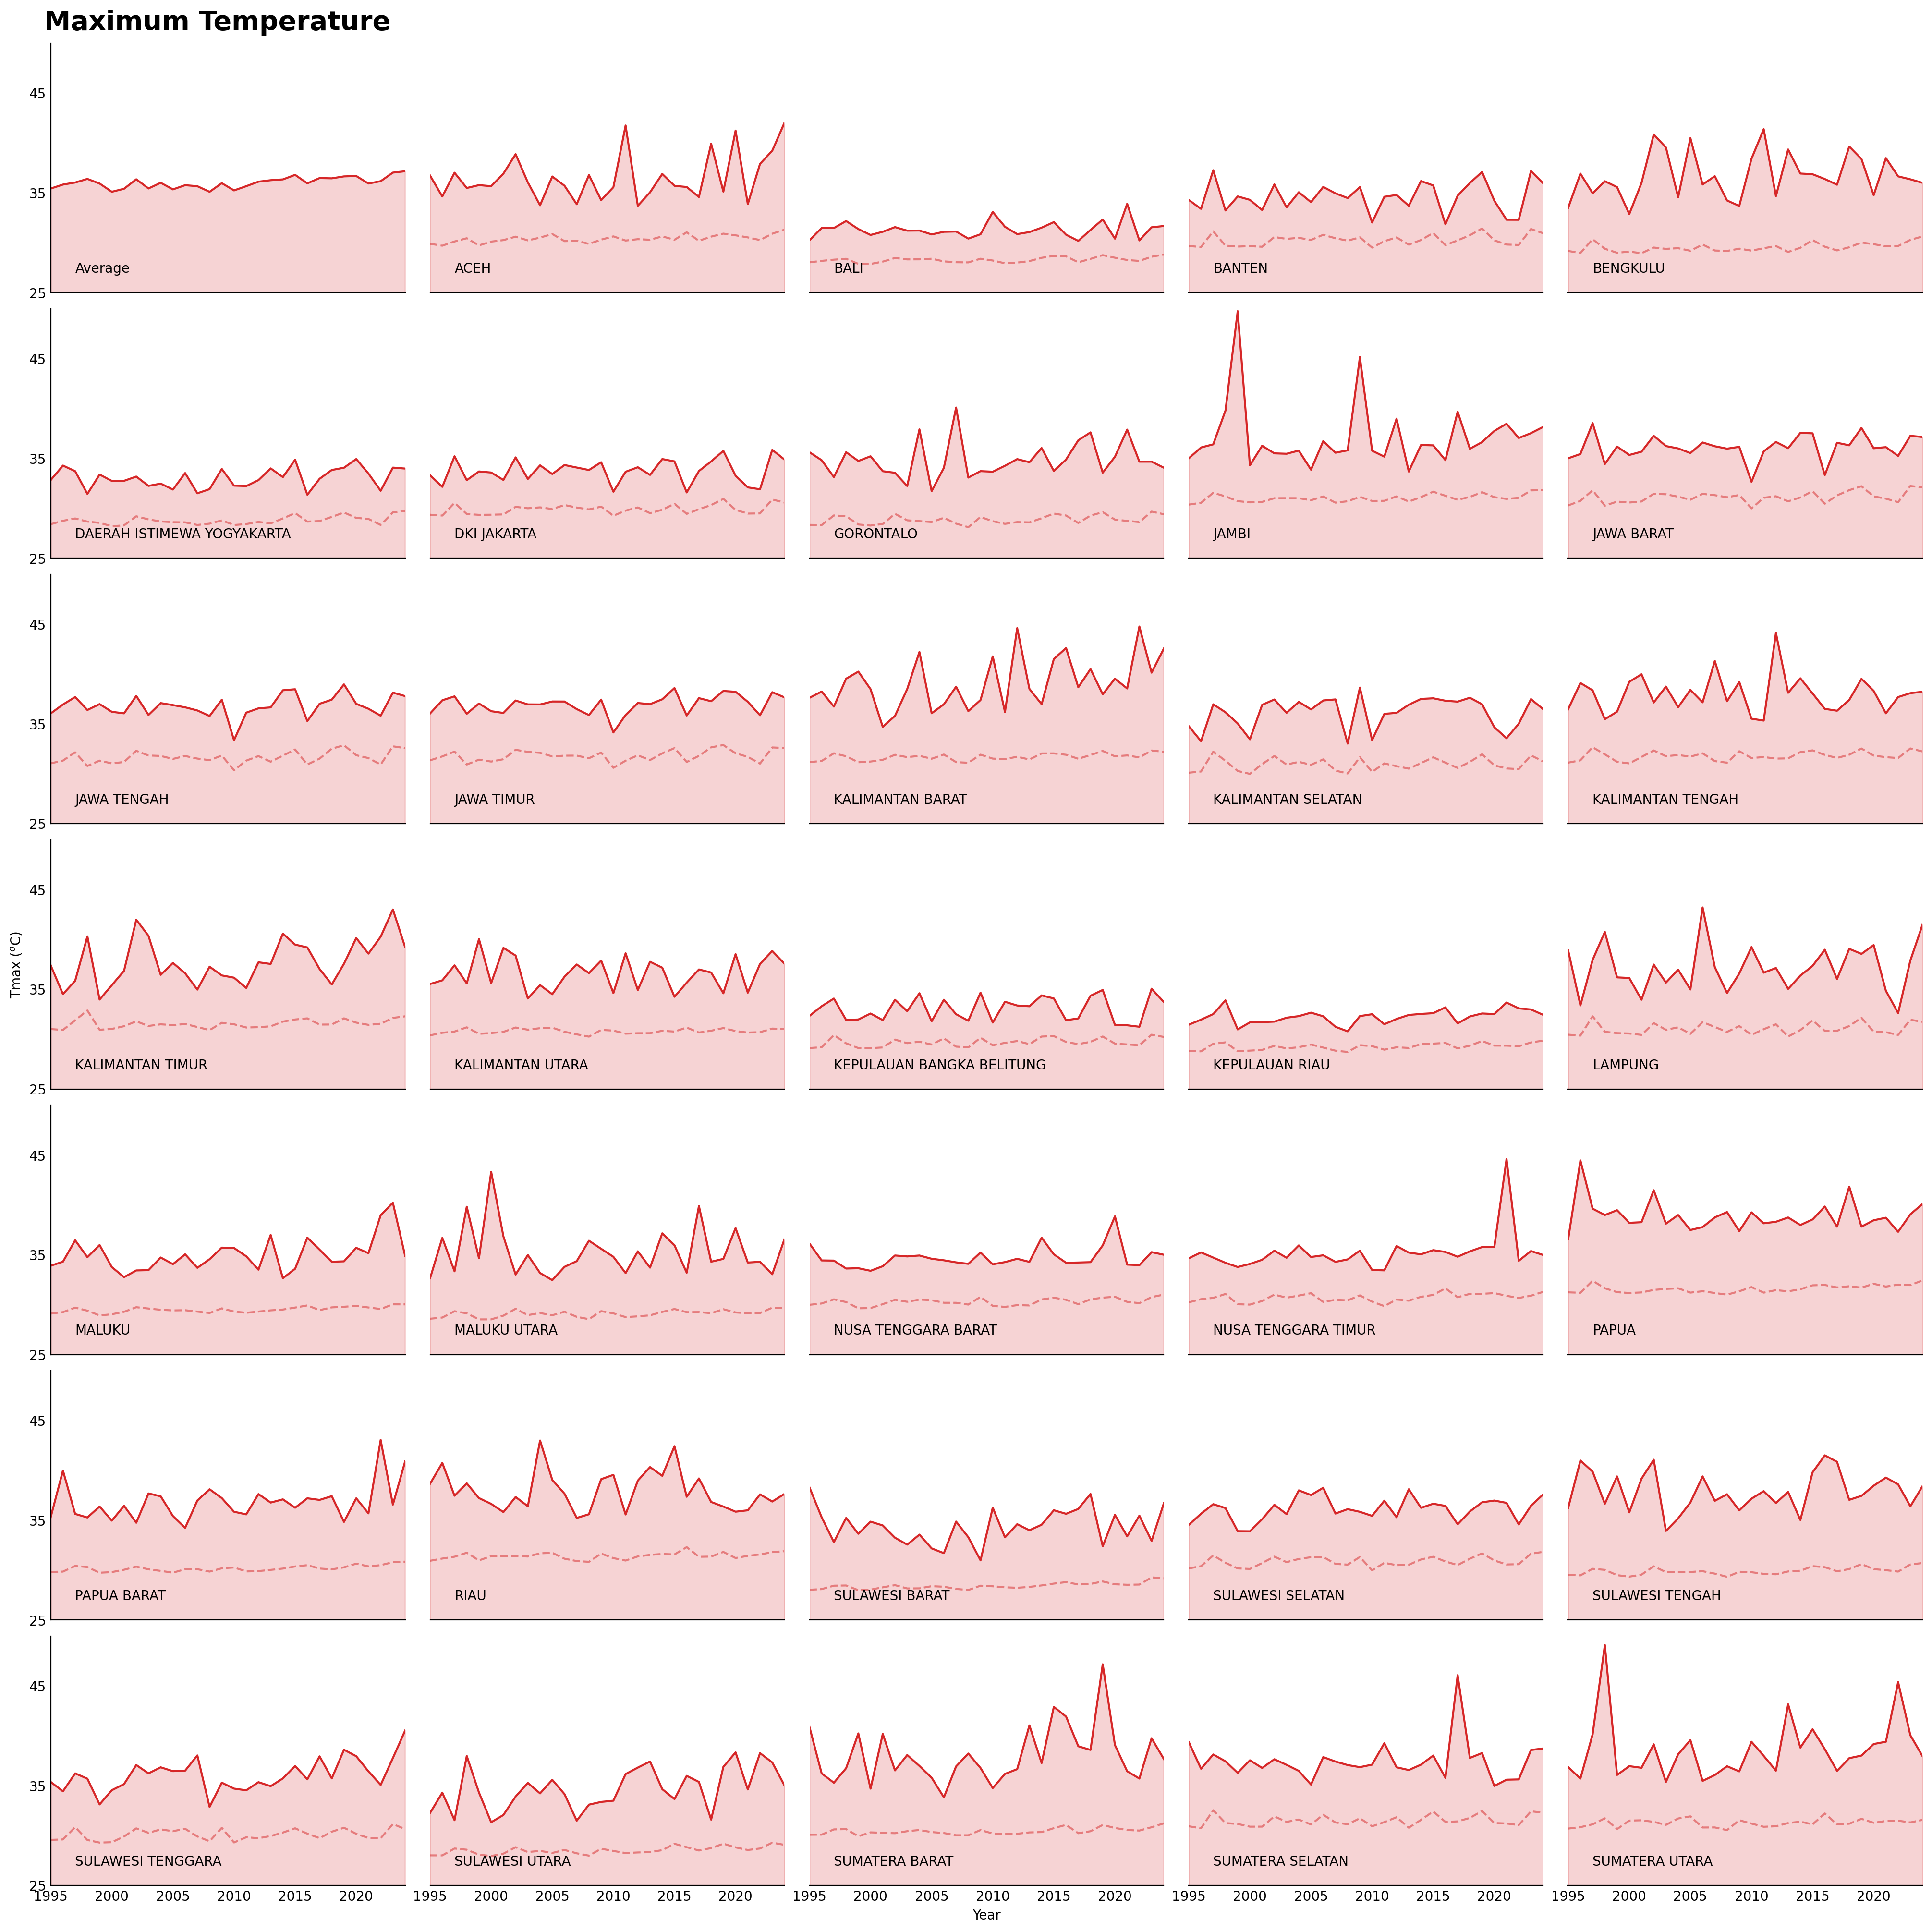

In [ ]:
fig, ax = plt.subplots(figsize=(20, 20), dpi=200, constrained_layout=True, 
                       nrows=7, ncols=5, sharex=True, sharey=True)
ax = ax.flatten()

tmax = max_temp_data.copy()
tmax = tmax.rename(columns={'max_temp':'tmax'})
mean_tmax = tmax.groupby(['province', 'year'])['tmax'].mean().reset_index()
tmax = tmax.groupby(['province', 'year'])['tmax'].max().reset_index()

for i, p in enumerate(provinces):

    # Fix: use the actual province name, not the string 'p'
    subset = tmax.loc[tmax['province'] == p, ['year', 'tmax']]
    subset_mean = mean_tmax.loc[mean_tmax['province'] == p, ['year', 'tmax']]
    ax[i+1].plot(subset.year, subset.tmax, color='tab:red')
    ax[i+1].plot(subset_mean.year, subset_mean.tmax, color='tab:red', ls='--', alpha=0.5)
    ax[i+1].fill_between(subset.year, subset.tmax, color='tab:red', alpha=0.2)

    ax[i+1].text(1997, 27, p)
    ax[i+1].set_yticks([25, 35, 45])


# indonesia average
tmax_idn = tmax.groupby(['year'])['tmax'].mean().reset_index()
ax[0].plot(tmax_idn.year, tmax_idn.tmax, color='tab:red')
ax[0].fill_between(tmax_idn.year, tmax_idn.tmax, color='tab:red', alpha=0.2)
ax[0].text(1997, 27, 'Average')


for i in range(35):
    ax[i].set_xlim([1995, 2024])
    ax[i].set_ylim([25, 50])
    ax[i].spines['top'].set_visible(False)
    ax[i].spines['right'].set_visible(False)
    ax[i].tick_params(axis='both', which='both', length=0)
    if i not in [0, 5, 10, 15, 20, 25, 30]:
        ax[i].spines['left'].set_visible(False)

ax[32].set_xlabel('Year')
ax[15].set_ylabel(r'Tmax ($^o$C)')
fig.suptitle('Maximum Temperature', fontweight='bold', fontsize=20, ha='left', x=0.02)
fig.savefig('result\Hazard_Tmax.png', dpi=200, bbox_inches='tight')
plt.show()

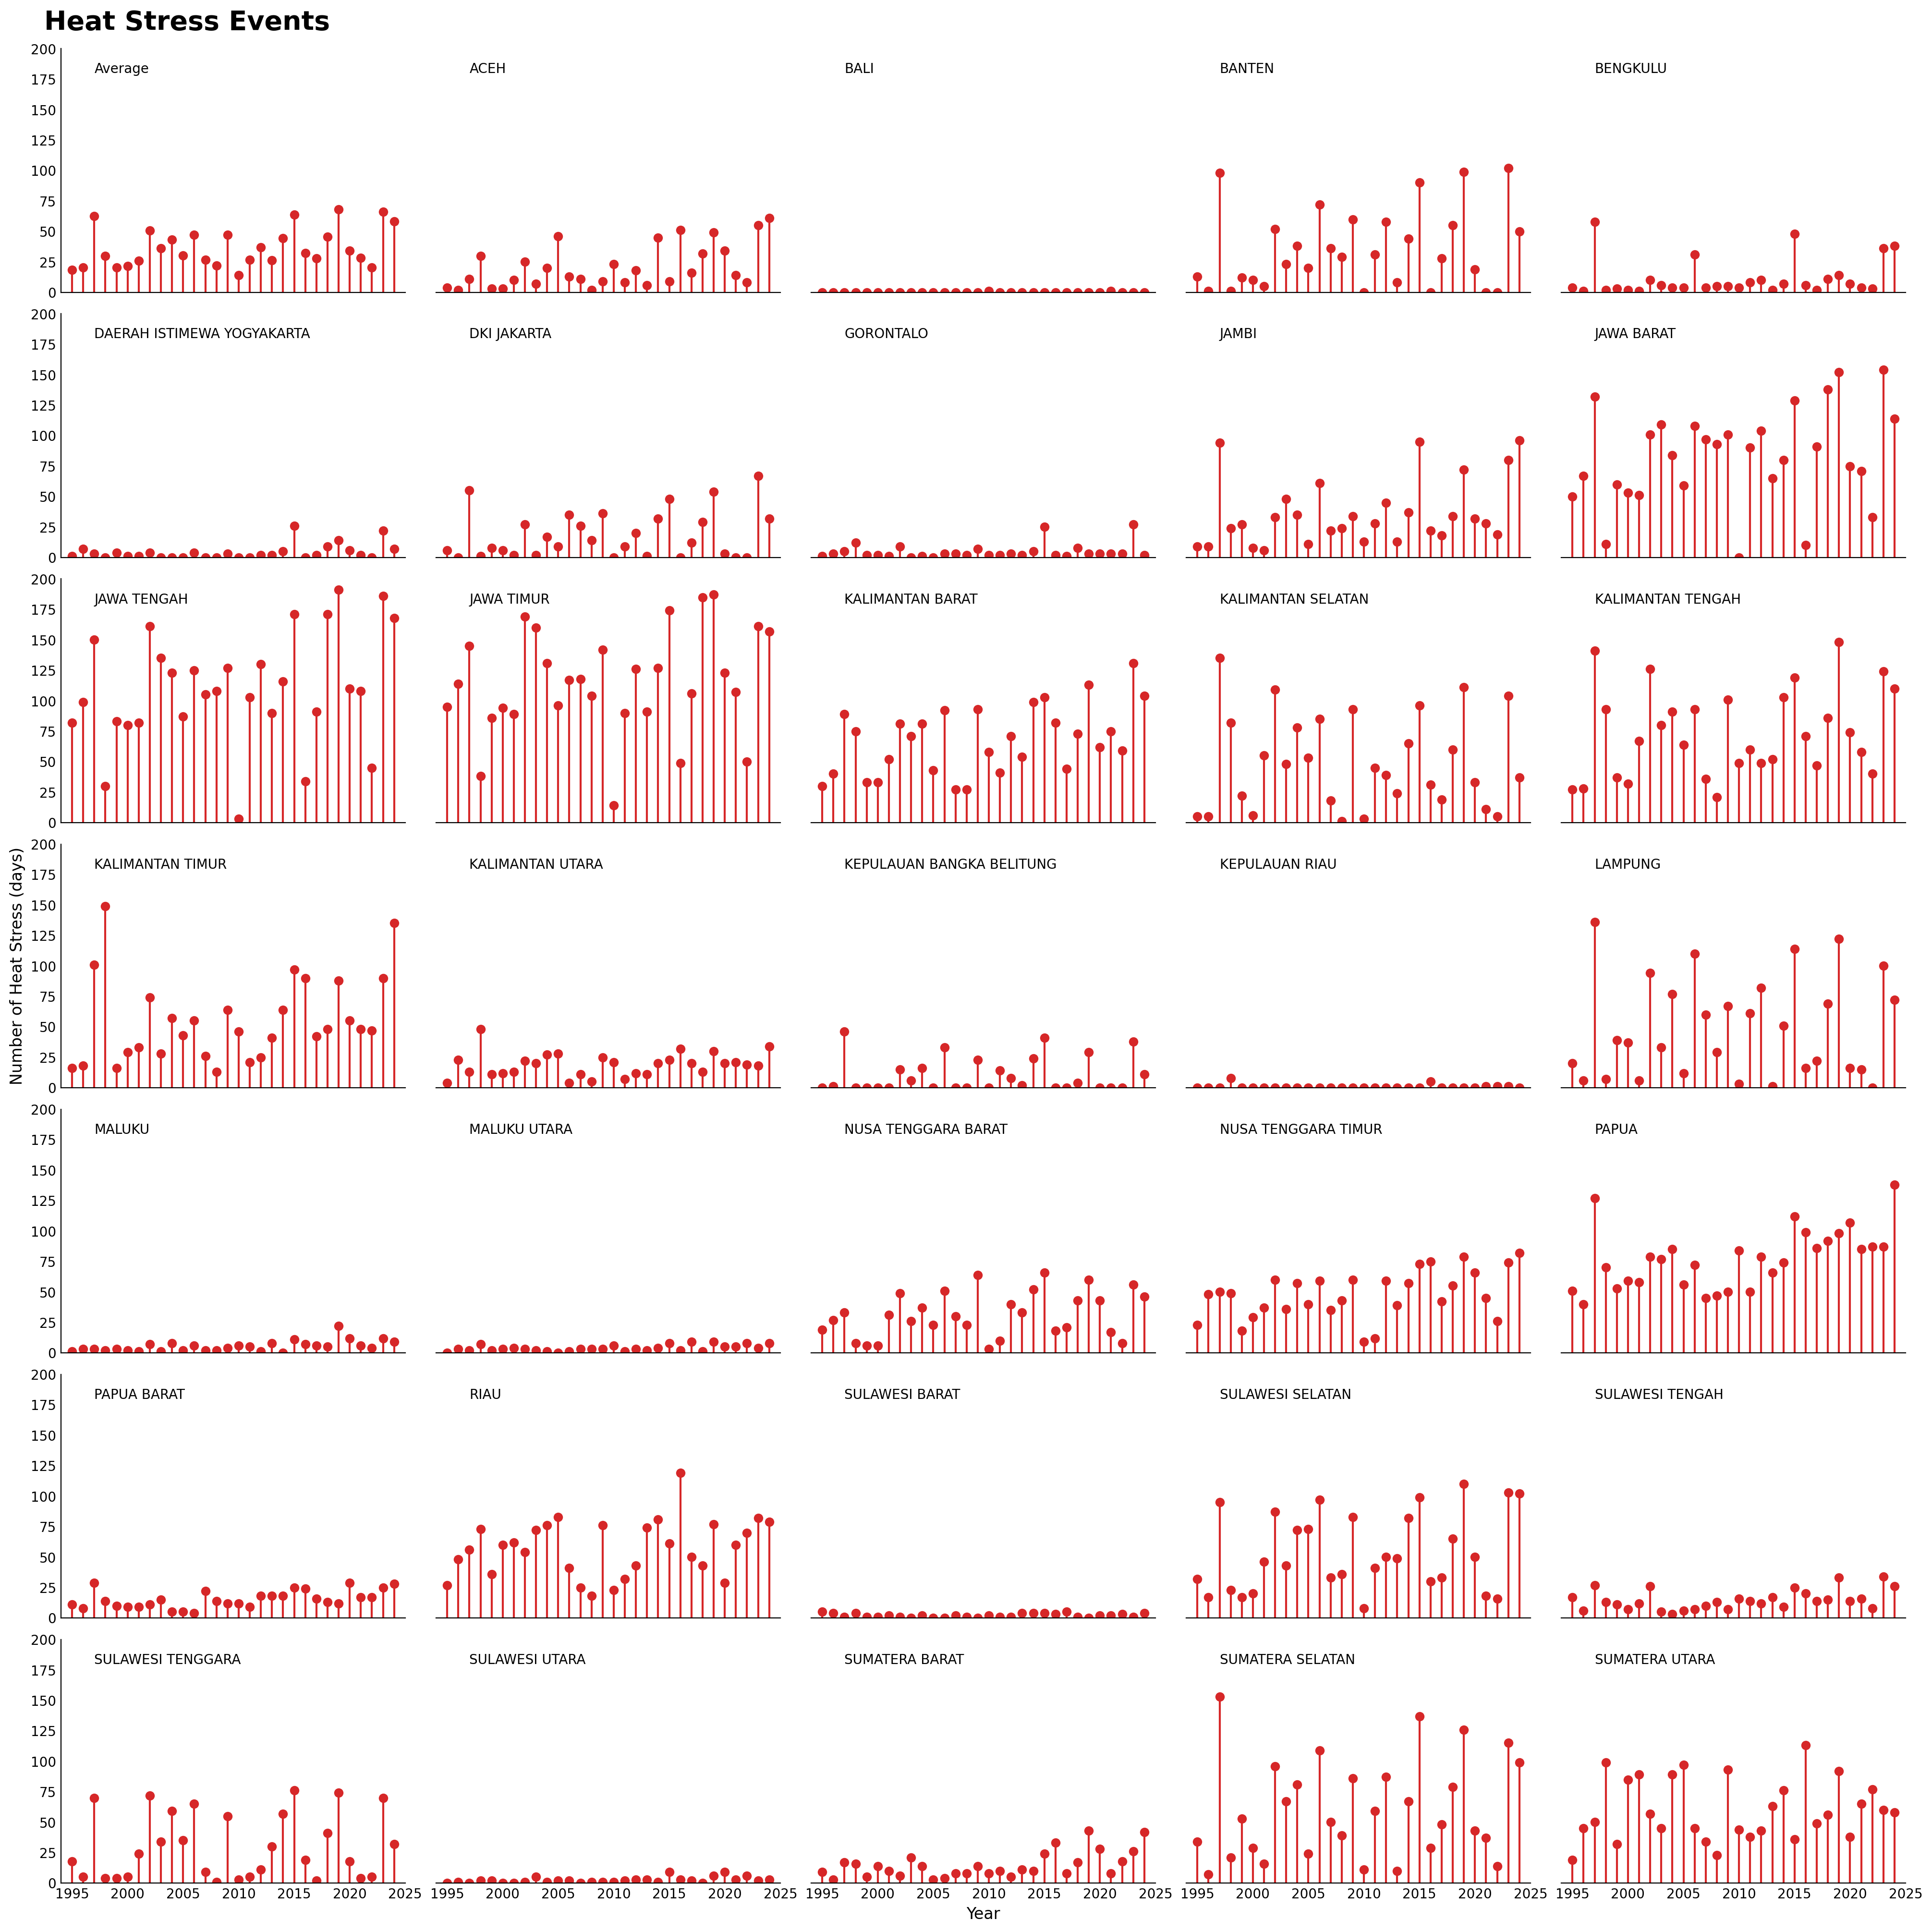

In [ ]:
fig, ax = plt.subplots(figsize=(20, 20), dpi=200, constrained_layout=True, 
                       nrows=7, ncols=5, sharex=True, sharey=True)
ax = ax.flatten()

dat = temp_data.copy()

for i, p in enumerate(provinces):
    col = 'heat_stress'
    # Fix: use the actual province name, not the string 'p'
    subset = dat.loc[dat['province'] == p, ['year', col]].reset_index(drop=True)
    for idx, hs in subset.iterrows():
        ax[i+1].vlines(x=hs.year, ymin=0, ymax=hs.heat_stress, color='tab:red')
        ax[i+1].plot(hs.year, hs.heat_stress, 'o', color='tab:red')

    ax[i+1].text(1997, 180, p, ha='left')

# indonesia average
avg_idn = dat.groupby(['year'])['heat_stress'].mean().reset_index(name=col)
for idx, hs in avg_idn.iterrows():
    ax[0].vlines(x=hs.year, ymin=0, ymax=hs.heat_stress, color='tab:red')
    ax[0].plot(hs.year, hs.heat_stress, 'o', color='tab:red')
ax[0].text(1997, 180, 'Average', ha='left')

for i in range(35):
    ax[i].set_ylim([0, 200])
    ax[i].set_xlim([1994, 2025])
    # ax[i].set_yticks([0, 20, 40, 60, 80])

    ax[i].spines['top'].set_visible(False)
    ax[i].spines['right'].set_visible(False)
    ax[i].tick_params(axis='both', which='both', length=0)
    if i not in [0, 5, 10, 15, 20, 25, 30]:
        ax[i].spines['left'].set_visible(False)

ax[32].set_xlabel('Year', fontsize=12)
ax[15].set_ylabel(r'Number of Heat Stress (days)', fontsize=12)
fig.suptitle('Heat Stress Events', fontweight='bold', fontsize=20, ha='left', x=0.02)
fig.savefig('result\Hazard_HeatStress.png', dpi=200, bbox_inches='tight')
plt.show()

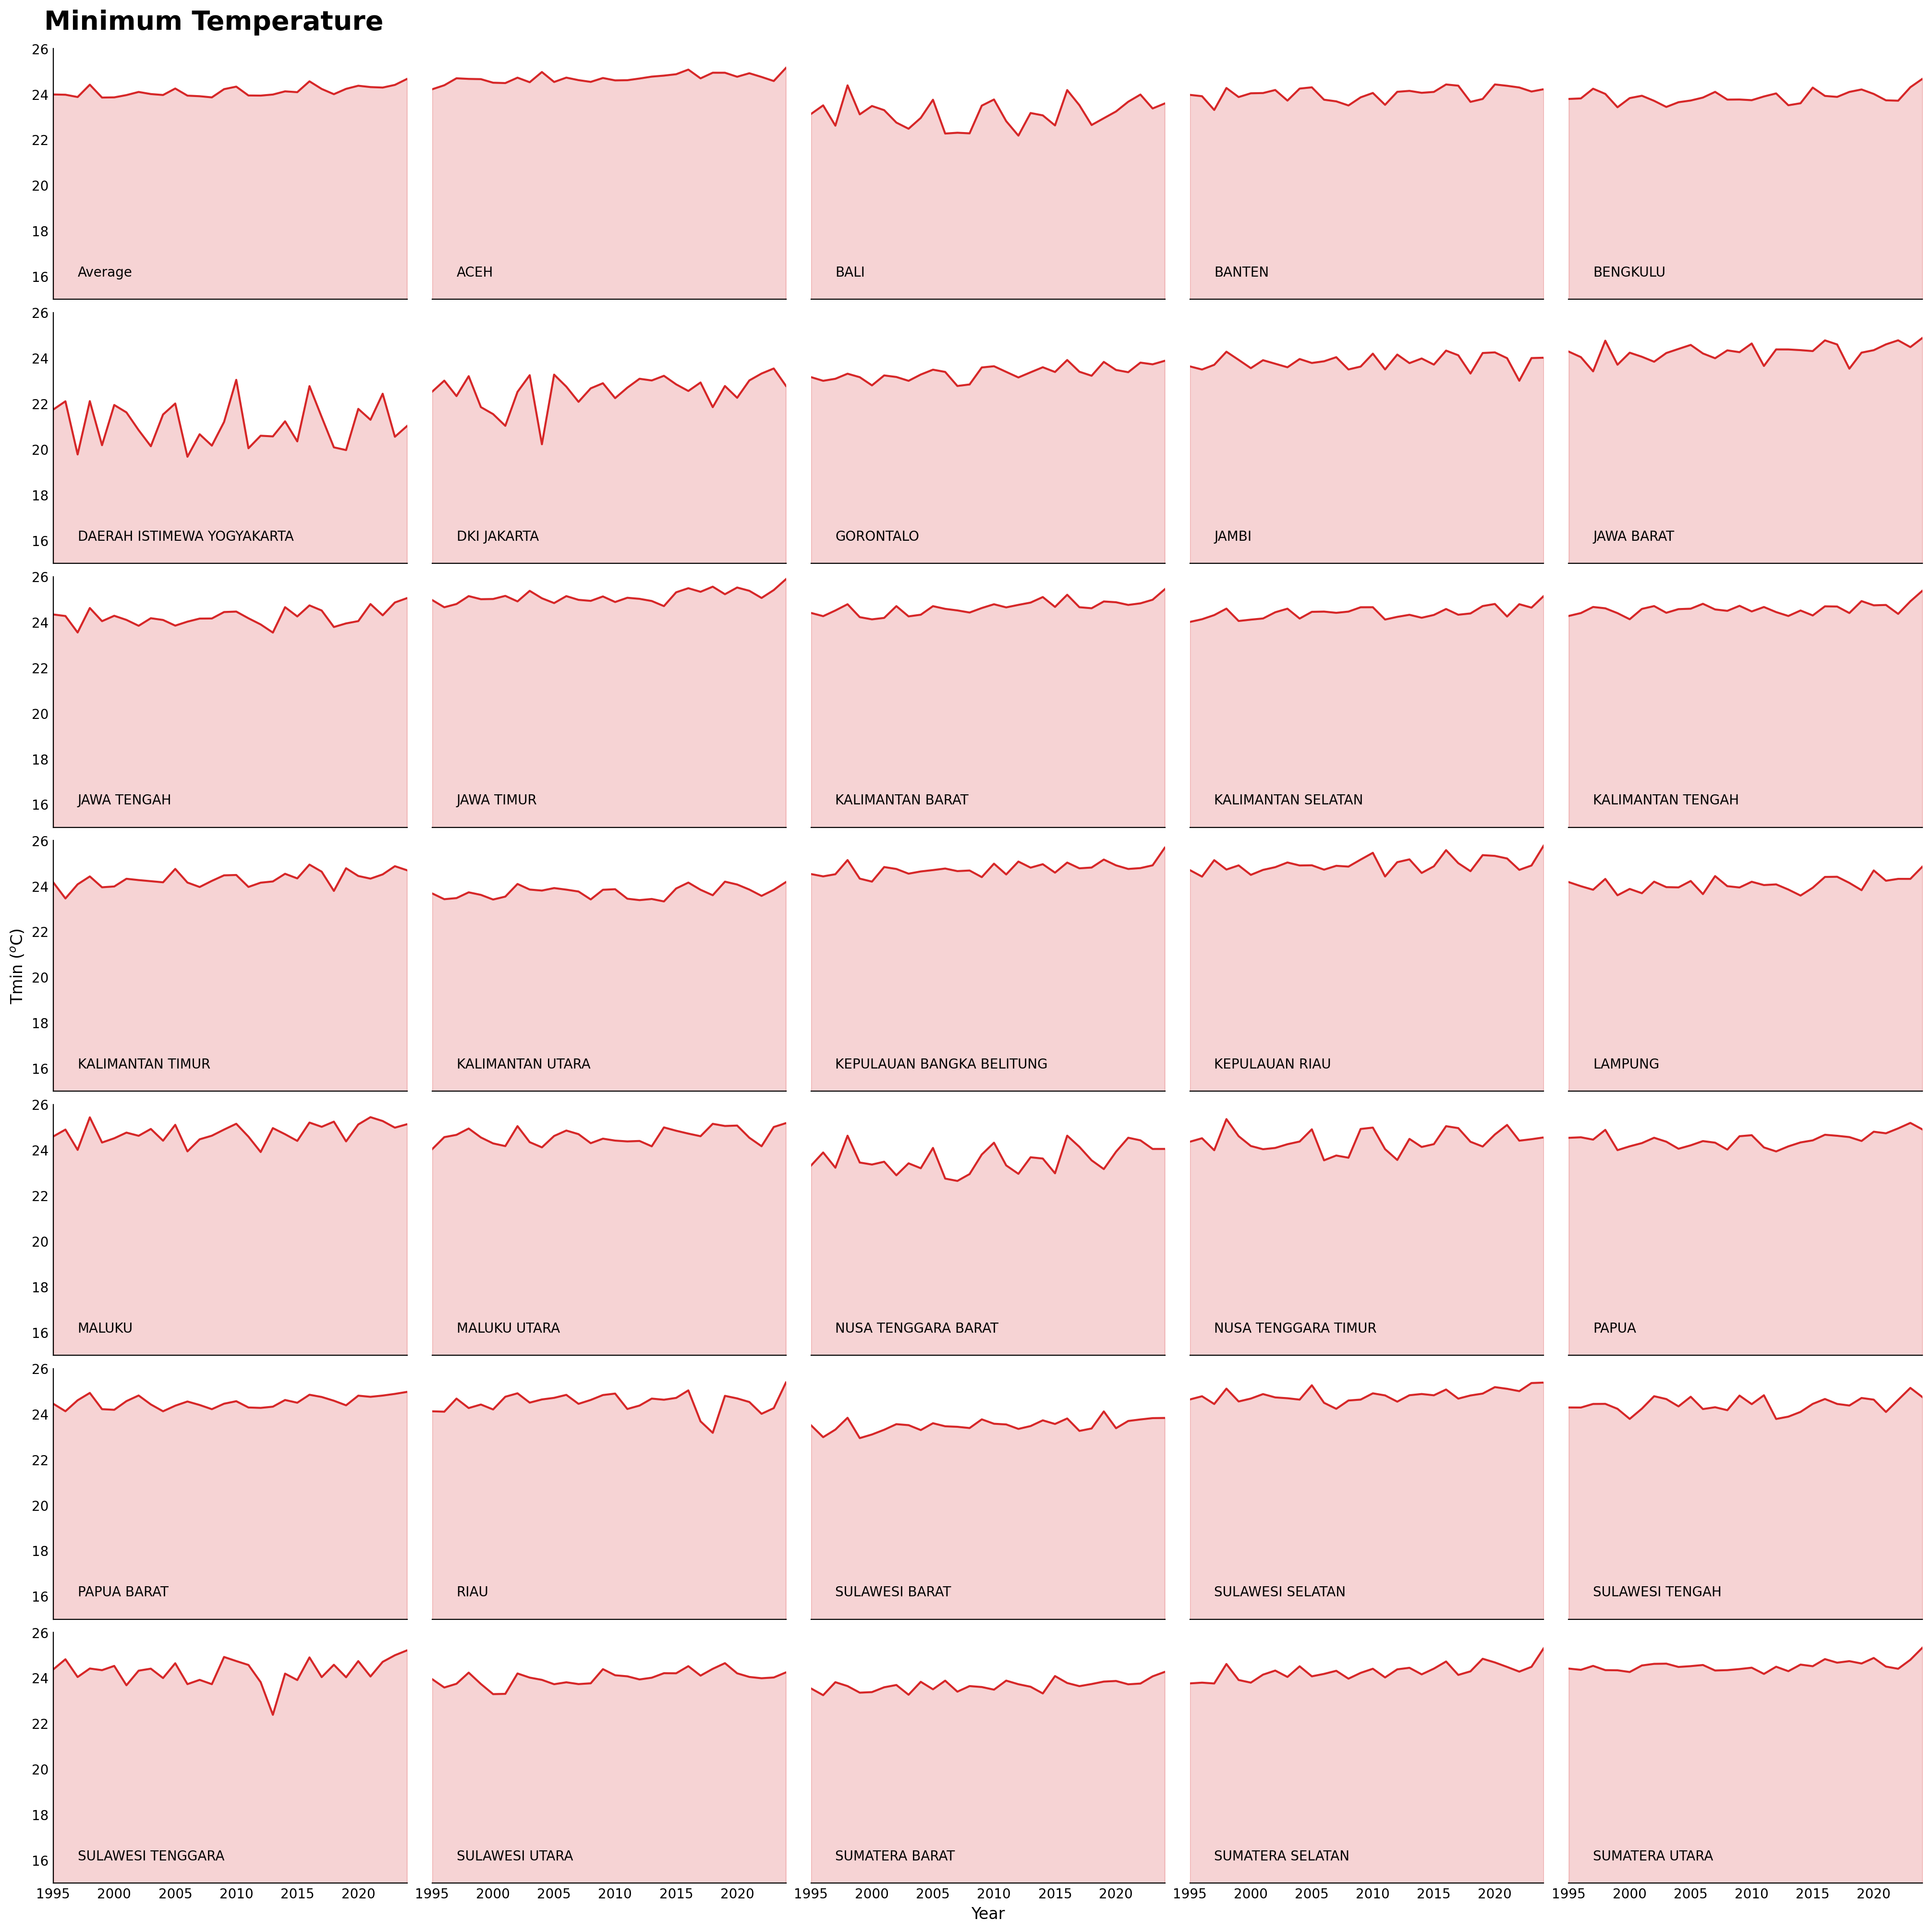

In [ ]:
fig, ax = plt.subplots(figsize=(20, 20), dpi=200, constrained_layout=True, 
                       nrows=7, ncols=5, sharex=True, sharey=True)
ax = ax.flatten()

dat = temp_data.copy()
var = 'tmin'

for i, p in enumerate(provinces):

    # Fix: use the actual province name, not the string 'p'
    subset = dat.loc[dat['province'] == p, ['year', var]]
    ax[i+1].plot(subset.year, subset[var], color='tab:red')
    # ax[i+1].plot(subset_mean.year, subset_mean[var], color='tab:red', ls='--', alpha=0.5)
    ax[i+1].fill_between(subset.year, subset[var], color='tab:red', alpha=0.2)

    ax[i+1].text(1997, 16, p)

# indonesia average
avg_idn = dat.groupby(['year'])[var].mean().reset_index()
ax[0].plot(avg_idn.year, avg_idn[var], color='tab:red')
ax[0].fill_between(avg_idn.year, avg_idn[var], color='tab:red', alpha=0.2)
ax[0].text(1997, 16, 'Average')


for i in range(35):
    ax[i].set_xlim([1995, 2024])
    ax[i].set_ylim([15, 26])
    # ax[i].set_yticks([25, 26, 27, 28, 29, 30])
    ax[i].spines['top'].set_visible(False)
    ax[i].spines['right'].set_visible(False)
    ax[i].tick_params(axis='both', which='both', length=0)
    if i not in [0, 5, 10, 15, 20, 25, 30]:
        ax[i].spines['left'].set_visible(False)

ax[32].set_xlabel('Year', fontsize=12)
ax[15].set_ylabel(r'Tmin ($^o$C)', fontsize=12)
fig.suptitle('Minimum Temperature', fontweight='bold', fontsize=20, ha='left', x=0.02)
fig.savefig('result\Hazard_Tmin.png', dpi=200, bbox_inches='tight')
plt.show()

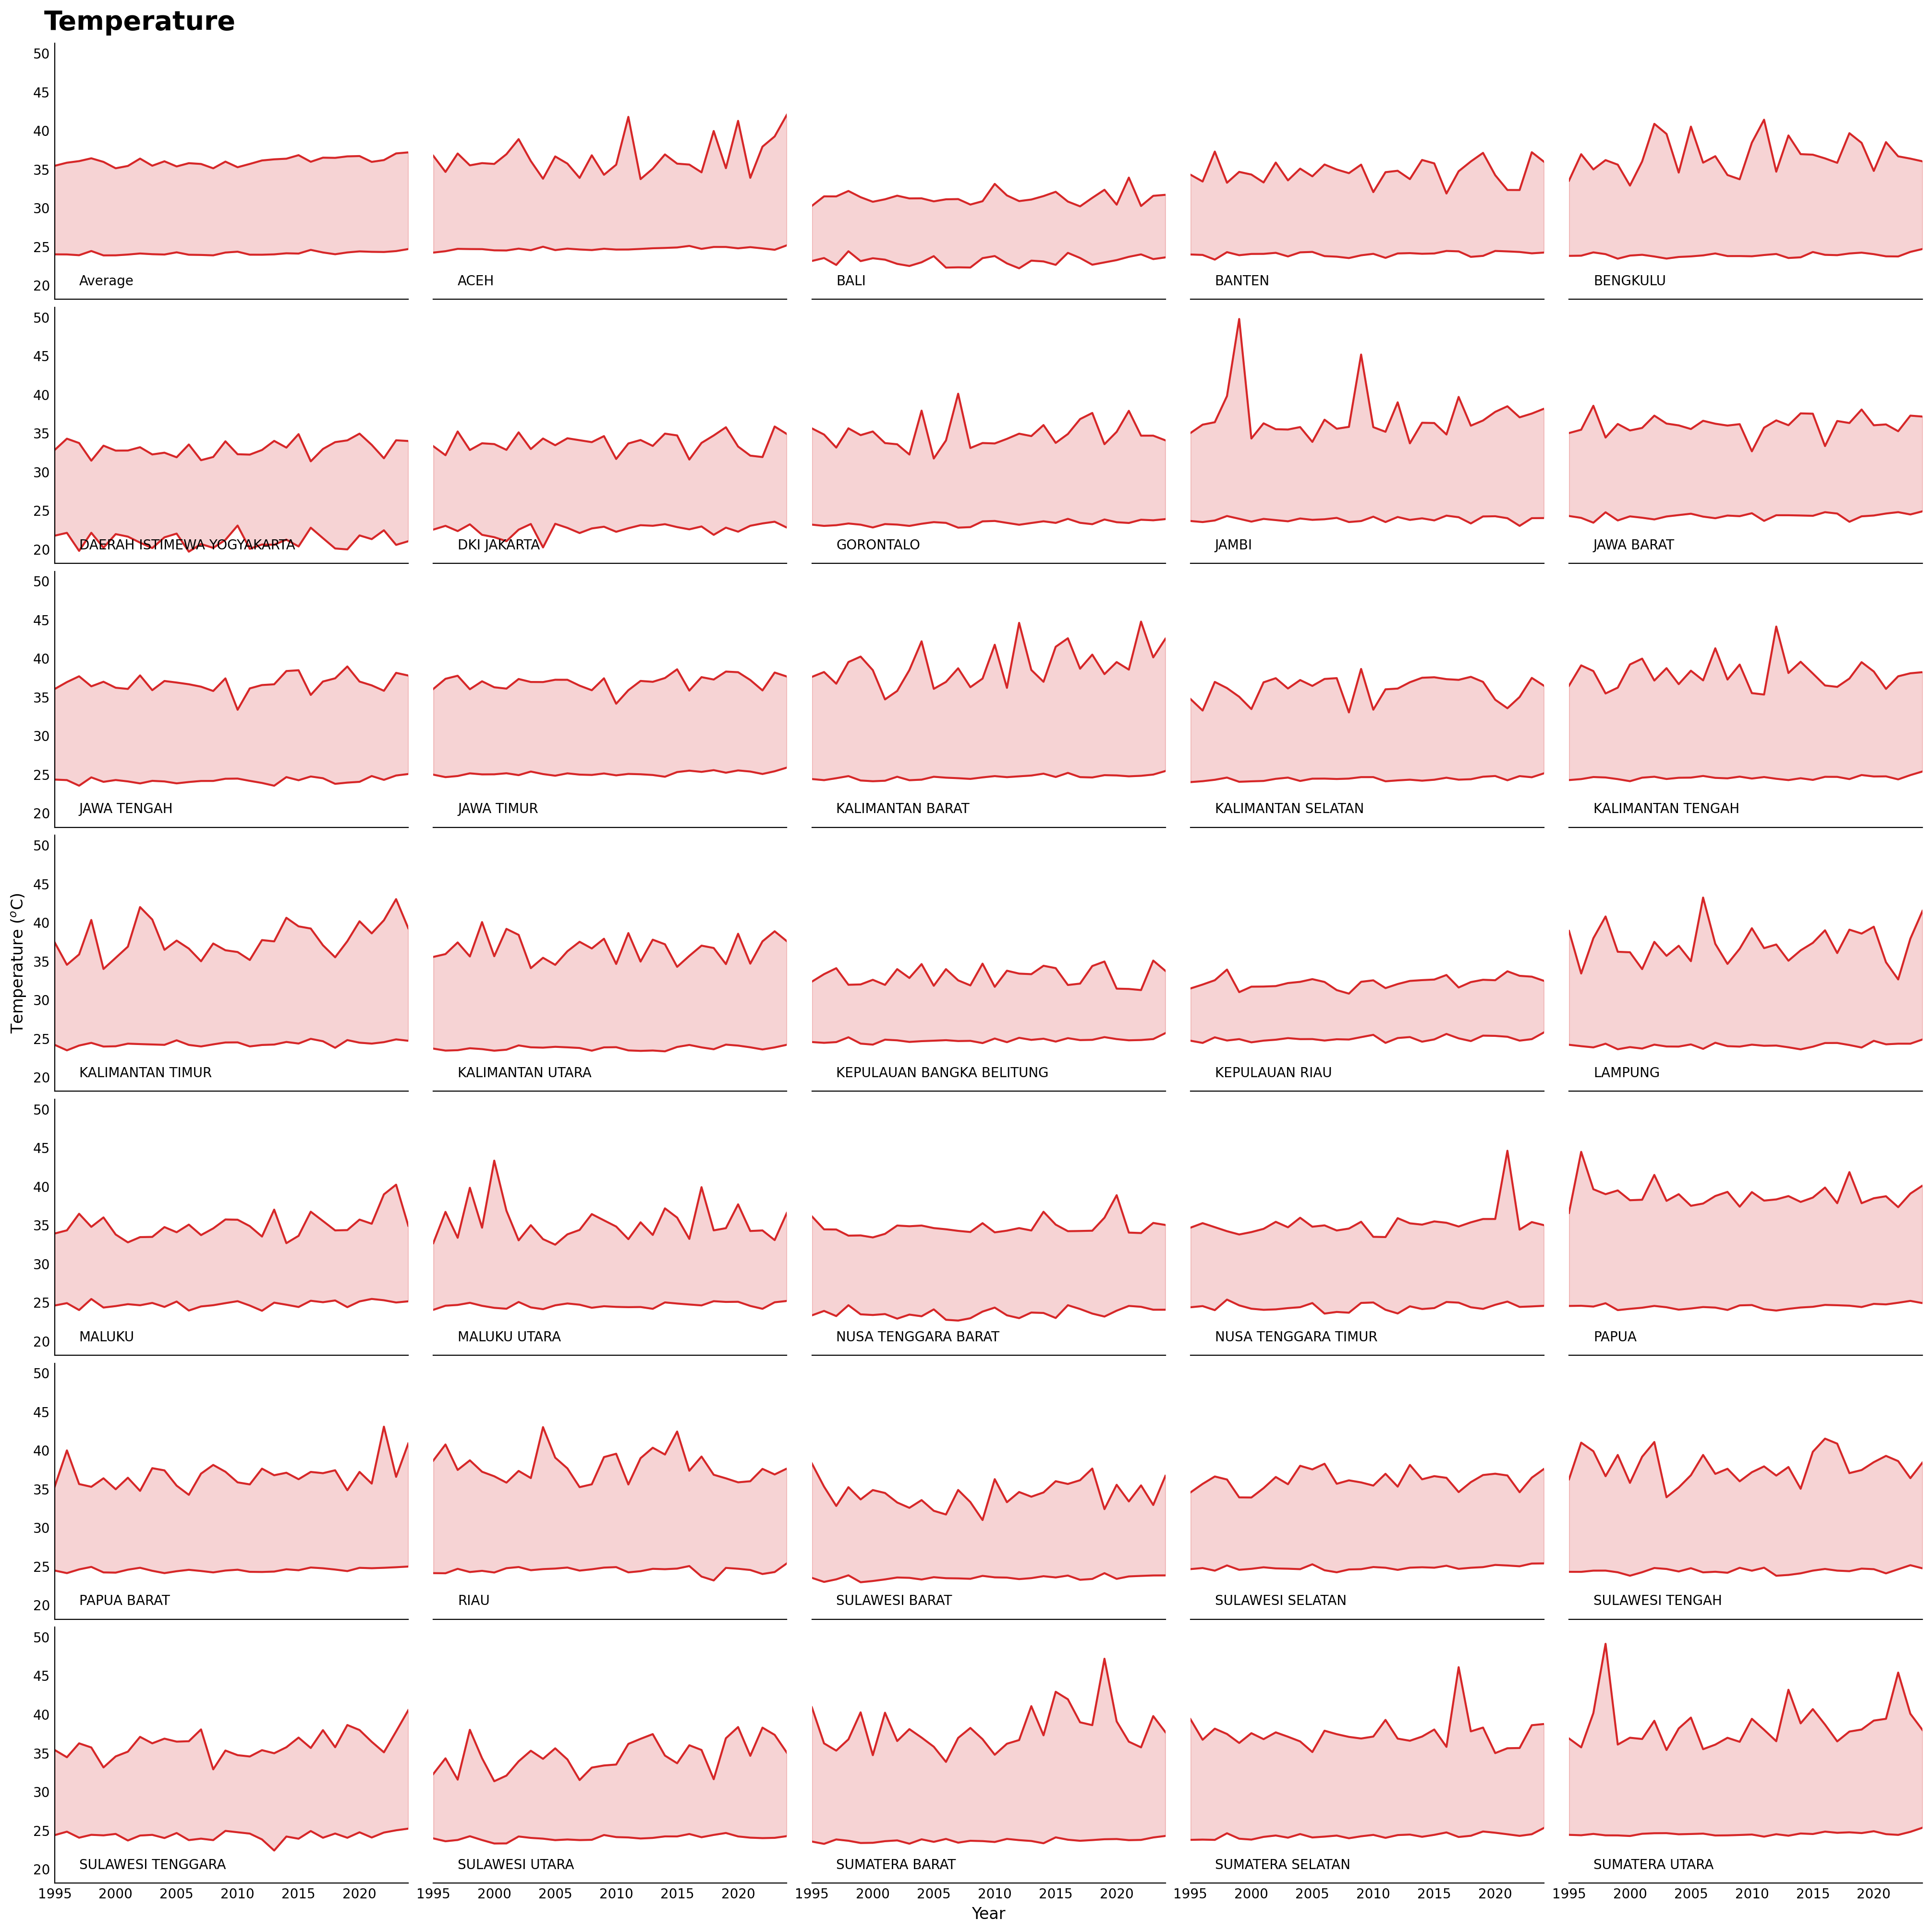

In [ ]:
fig, ax = plt.subplots(figsize=(20, 20), dpi=200, constrained_layout=True, 
                       nrows=7, ncols=5, sharex=True, sharey=True)
ax = ax.flatten()

dat = temp_data.copy()
var = 'tmin'

for i, p in enumerate(provinces):

    # Fix: use the actual province name, not the string 'p'
    subset = dat.loc[dat['province'] == p, ['year', 'tmax', 'tmin']]
    for var in ['tmax', 'tmin']:
        ax[i+1].plot(subset.year, subset[var], color='tab:red')
    # ax[i+1].plot(subset_mean.year, subset_mean[var], color='tab:red', ls='--', alpha=0.5)
    ax[i+1].fill_between(x=subset.year, y1=subset['tmin'], y2=subset['tmax'], color='tab:red', alpha=0.2)
    ax[i+1].text(1997, 20, p)
    # ax[i+1].set_yticks([25, 35, 45])


# indonesia average
avg_idn = dat.groupby(['year'])[['tmax', 'tmin']].mean().reset_index()
for var in ['tmax', 'tmin']:
    ax[0].plot(avg_idn.year, avg_idn[var], color='tab:red')
ax[0].fill_between(avg_idn.year, avg_idn['tmin'], avg_idn['tmax'], color='tab:red', alpha=0.2)
ax[0].text(1997, 20, 'Average')


for i in range(35):
    ax[i].set_xlim([1995, 2024])
    # ax[i].set_ylim([25, 30])
    # ax[i].set_yticks([25, 26, 27, 28, 29, 30])
    ax[i].spines['top'].set_visible(False)
    ax[i].spines['right'].set_visible(False)
    ax[i].tick_params(axis='both', which='both', length=0)
    if i not in [0, 5, 10, 15, 20, 25, 30]:
        ax[i].spines['left'].set_visible(False)

ax[32].set_xlabel('Year', fontsize=12)
ax[15].set_ylabel(r'Temperature ($^o$C)', fontsize=12)
fig.suptitle('Temperature', fontweight='bold', fontsize=20, ha='left', x=0.02)
fig.savefig('result\Hazard_Temp.png', dpi=200, bbox_inches='tight')
plt.show()

#### Precipitation

In [237]:
vis_config = {
    'rx1': {'ylim':[0, 600], 'yticks':[100, 200, 300, 400, 500], 'ylabel':'RX1 (mm)', 'text_pos':[1997, 20], 'title':'Maximum 1-Day Precipitation'}, 
    'rx5': {'ylim':[50, 1400], 'yticks':[250, 500, 750, 1000, 1250], 'ylabel':'RX5 (mm)', 'text_pos':[1997, 100], 'title':'Maximum Consecutive 5-Day Precipitation'},
    'prcptot': {'ylim':[1000, 50000], 'yticks':np.arange(10000, 50000, 10000), 'ylabel':'Total Precipitation (mm)', 'text_pos':[1997, 5000], 'title':'Total Precipitation'},
    'cdd': {'ylim':[0, 40], 'yticks':[10, 20, 30], 'ylabel':'Maximum Number of Days', 'text_pos':[1977, 125], 'title': 'Consecutive Dry Days'},
    'cwd': {'ylim':[20, 400], 'yticks':[100, 200, 300], 'ylabel':'Maximum Number of Days', 'text_pos':[1977, 350], 'title': 'Consecutive Wet Days'}
}

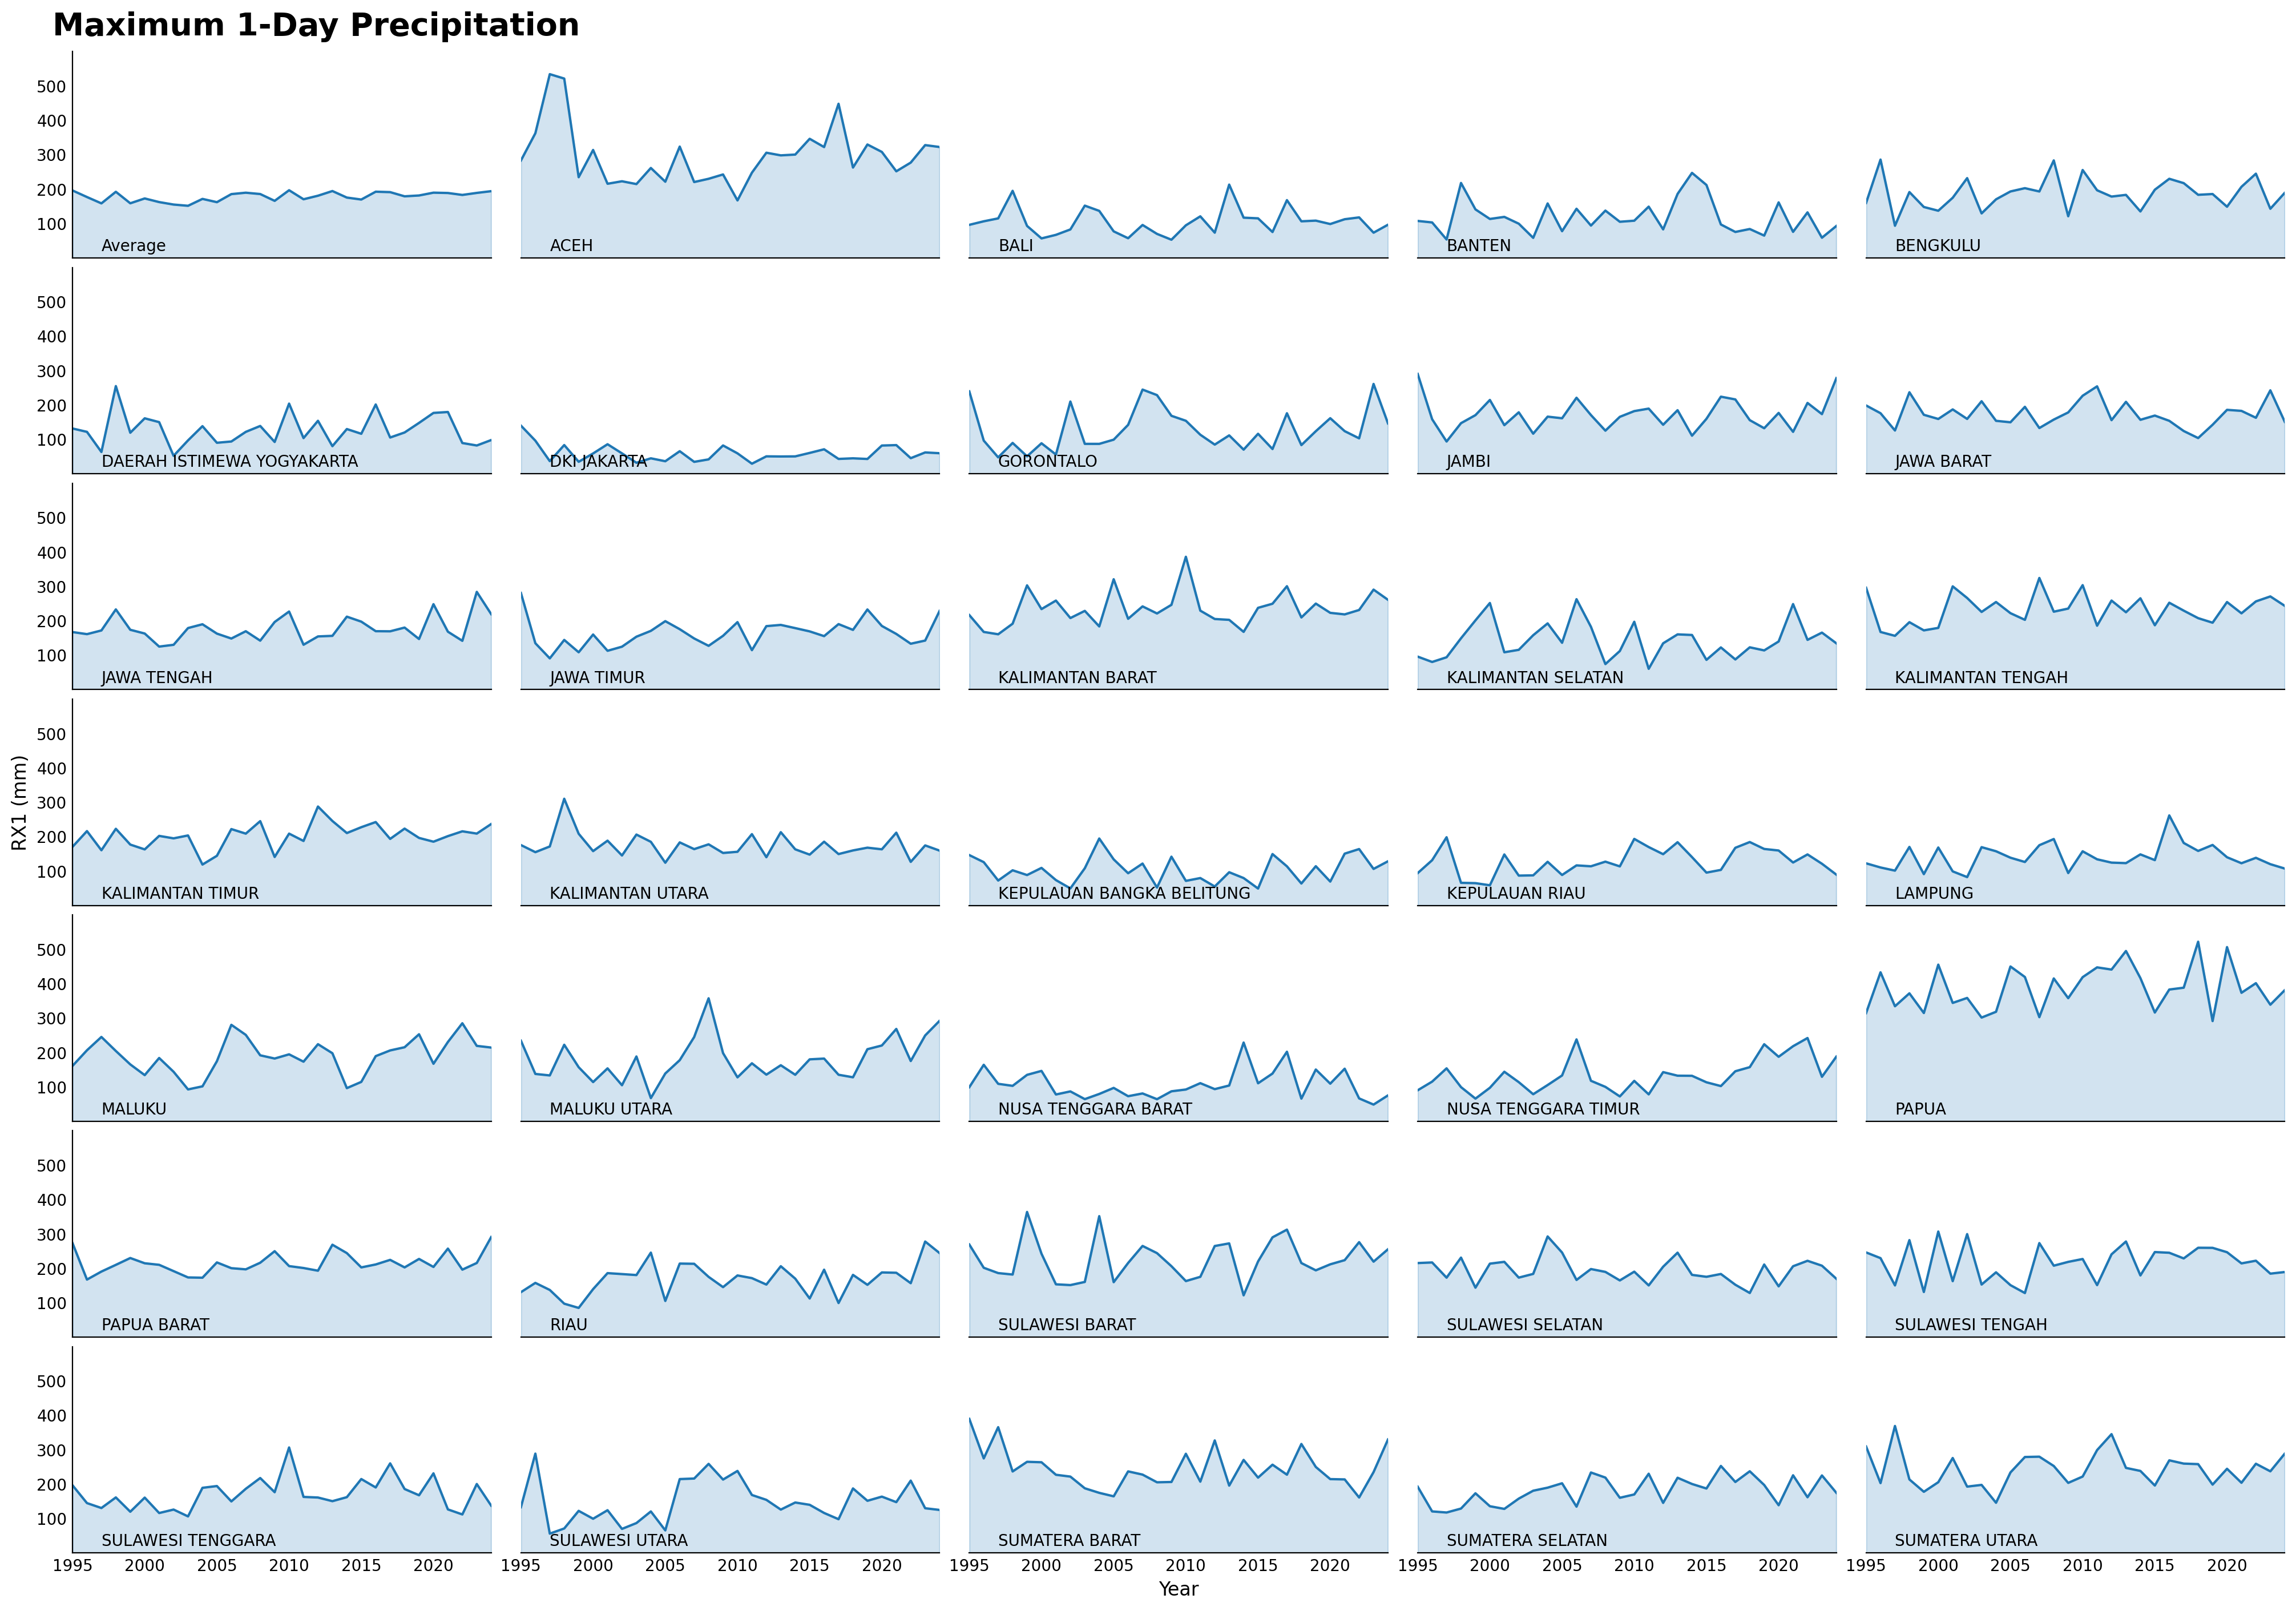

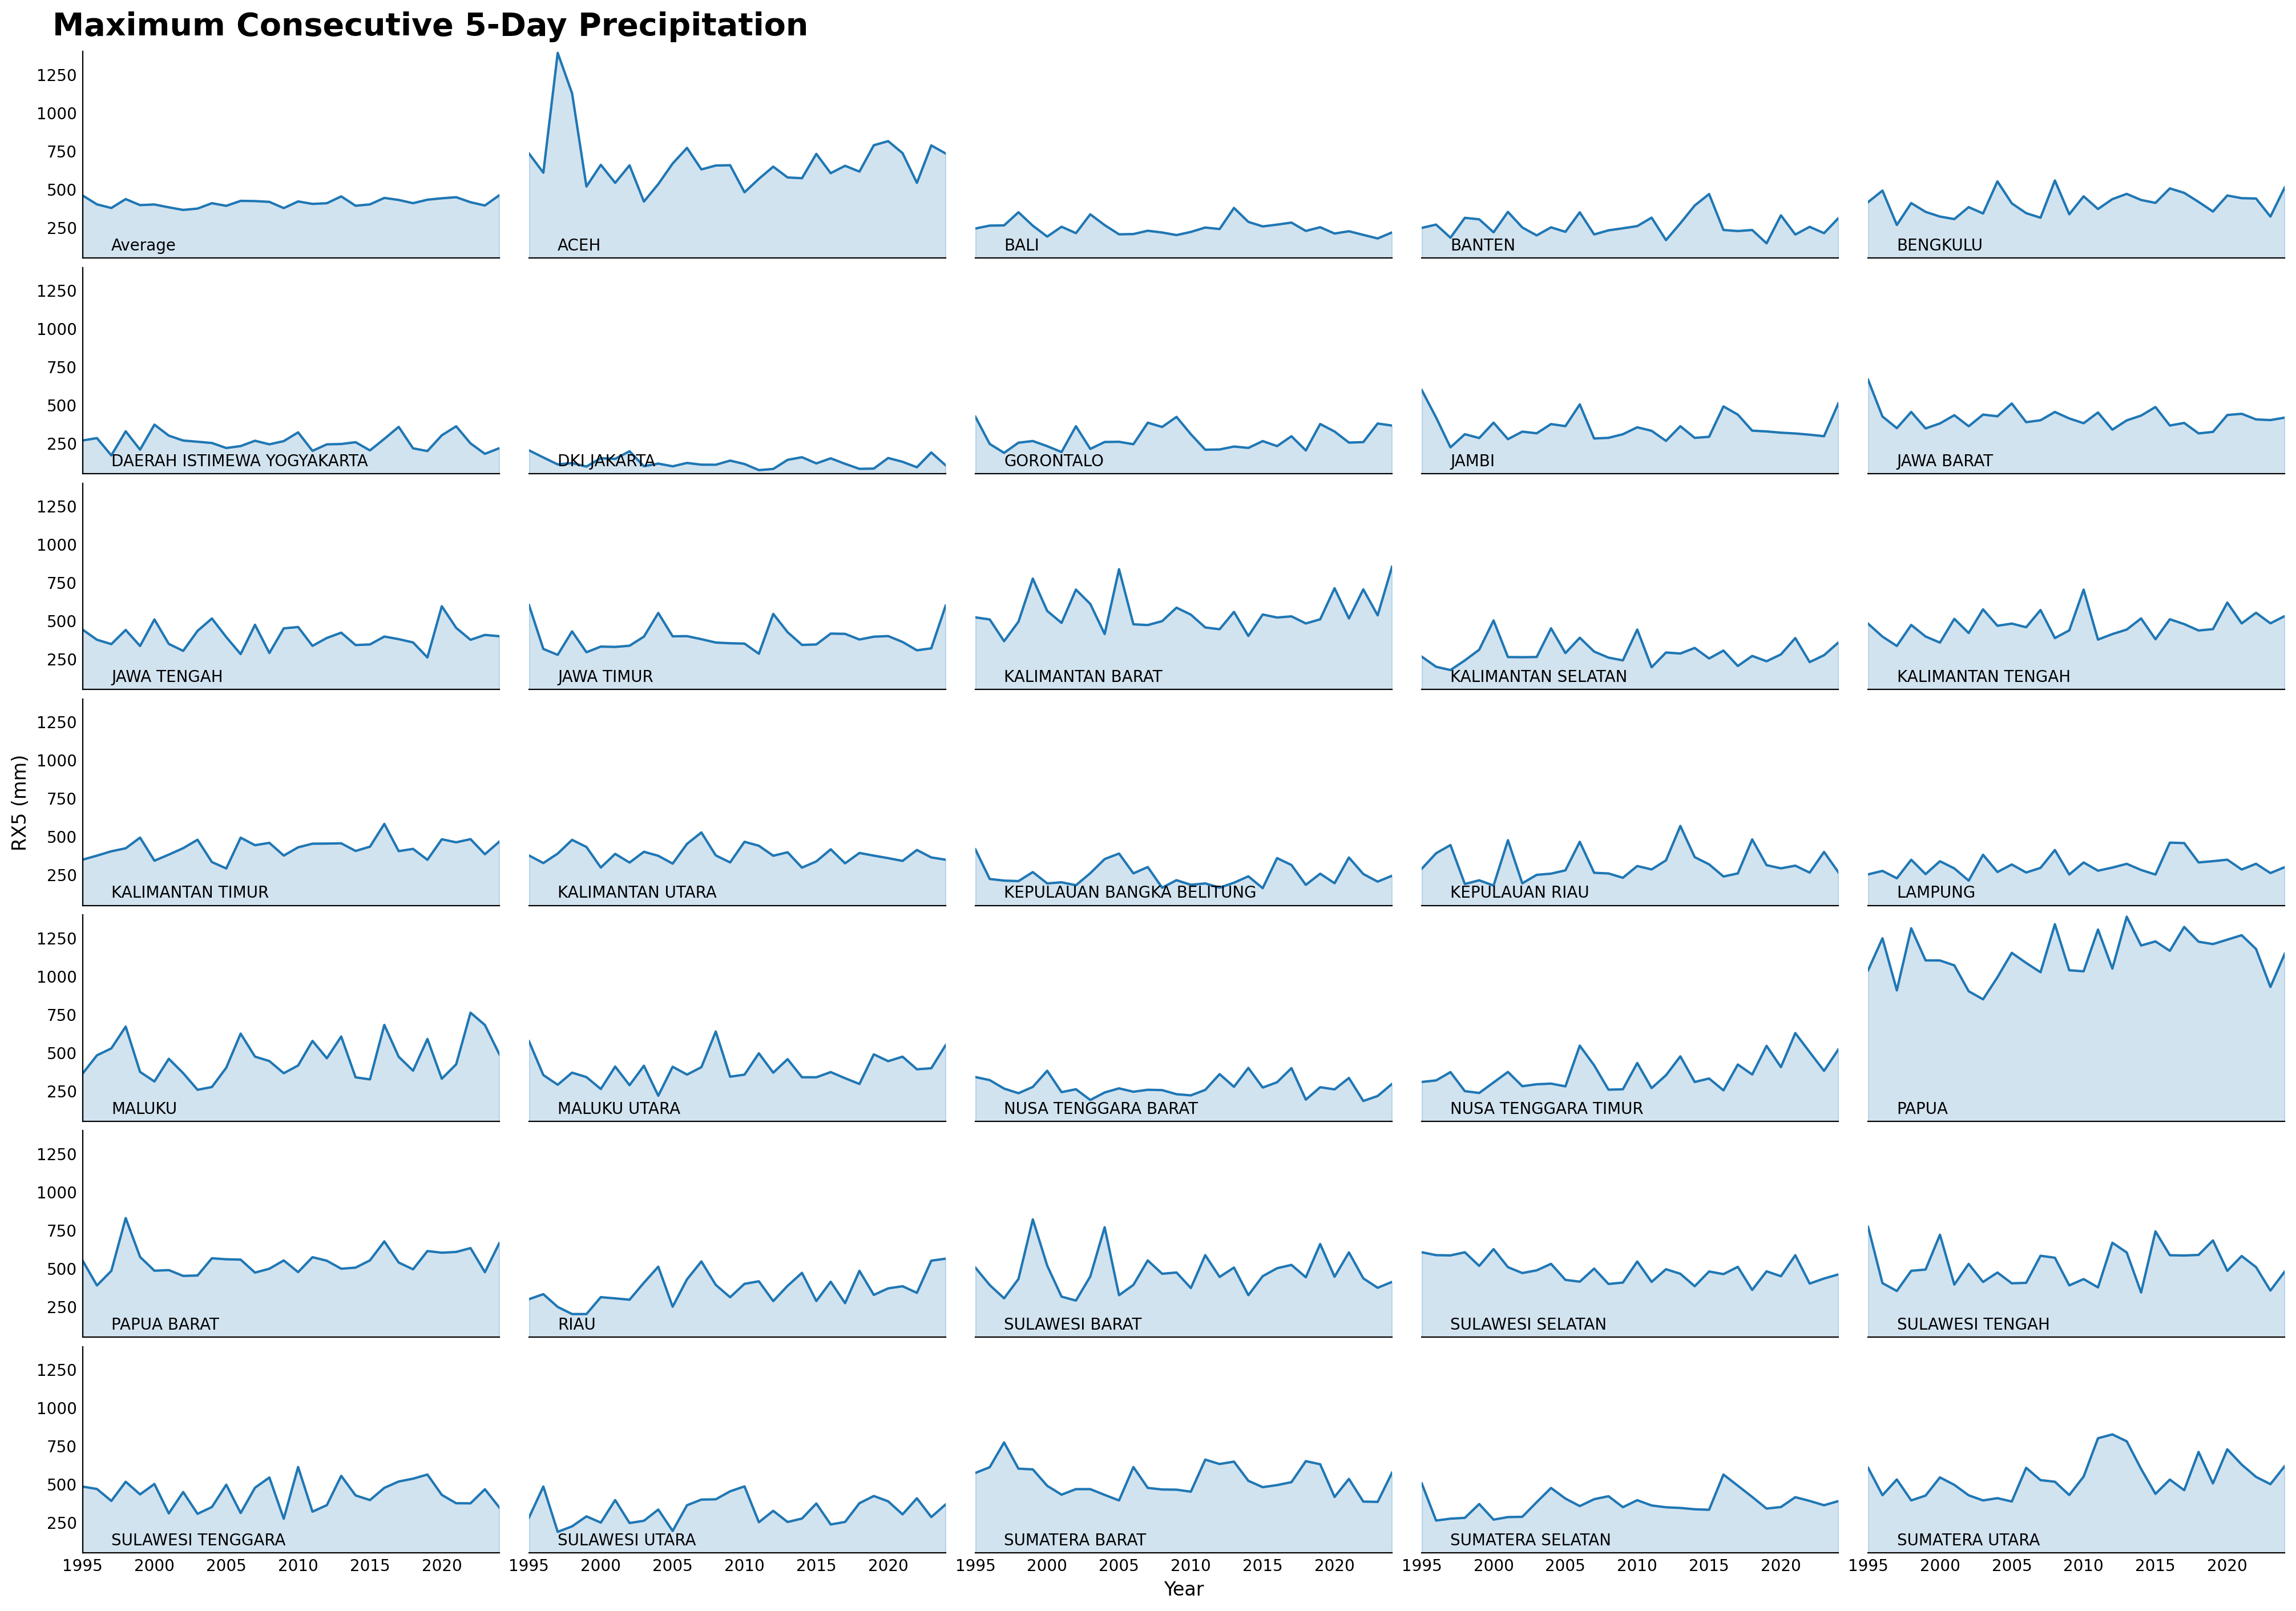

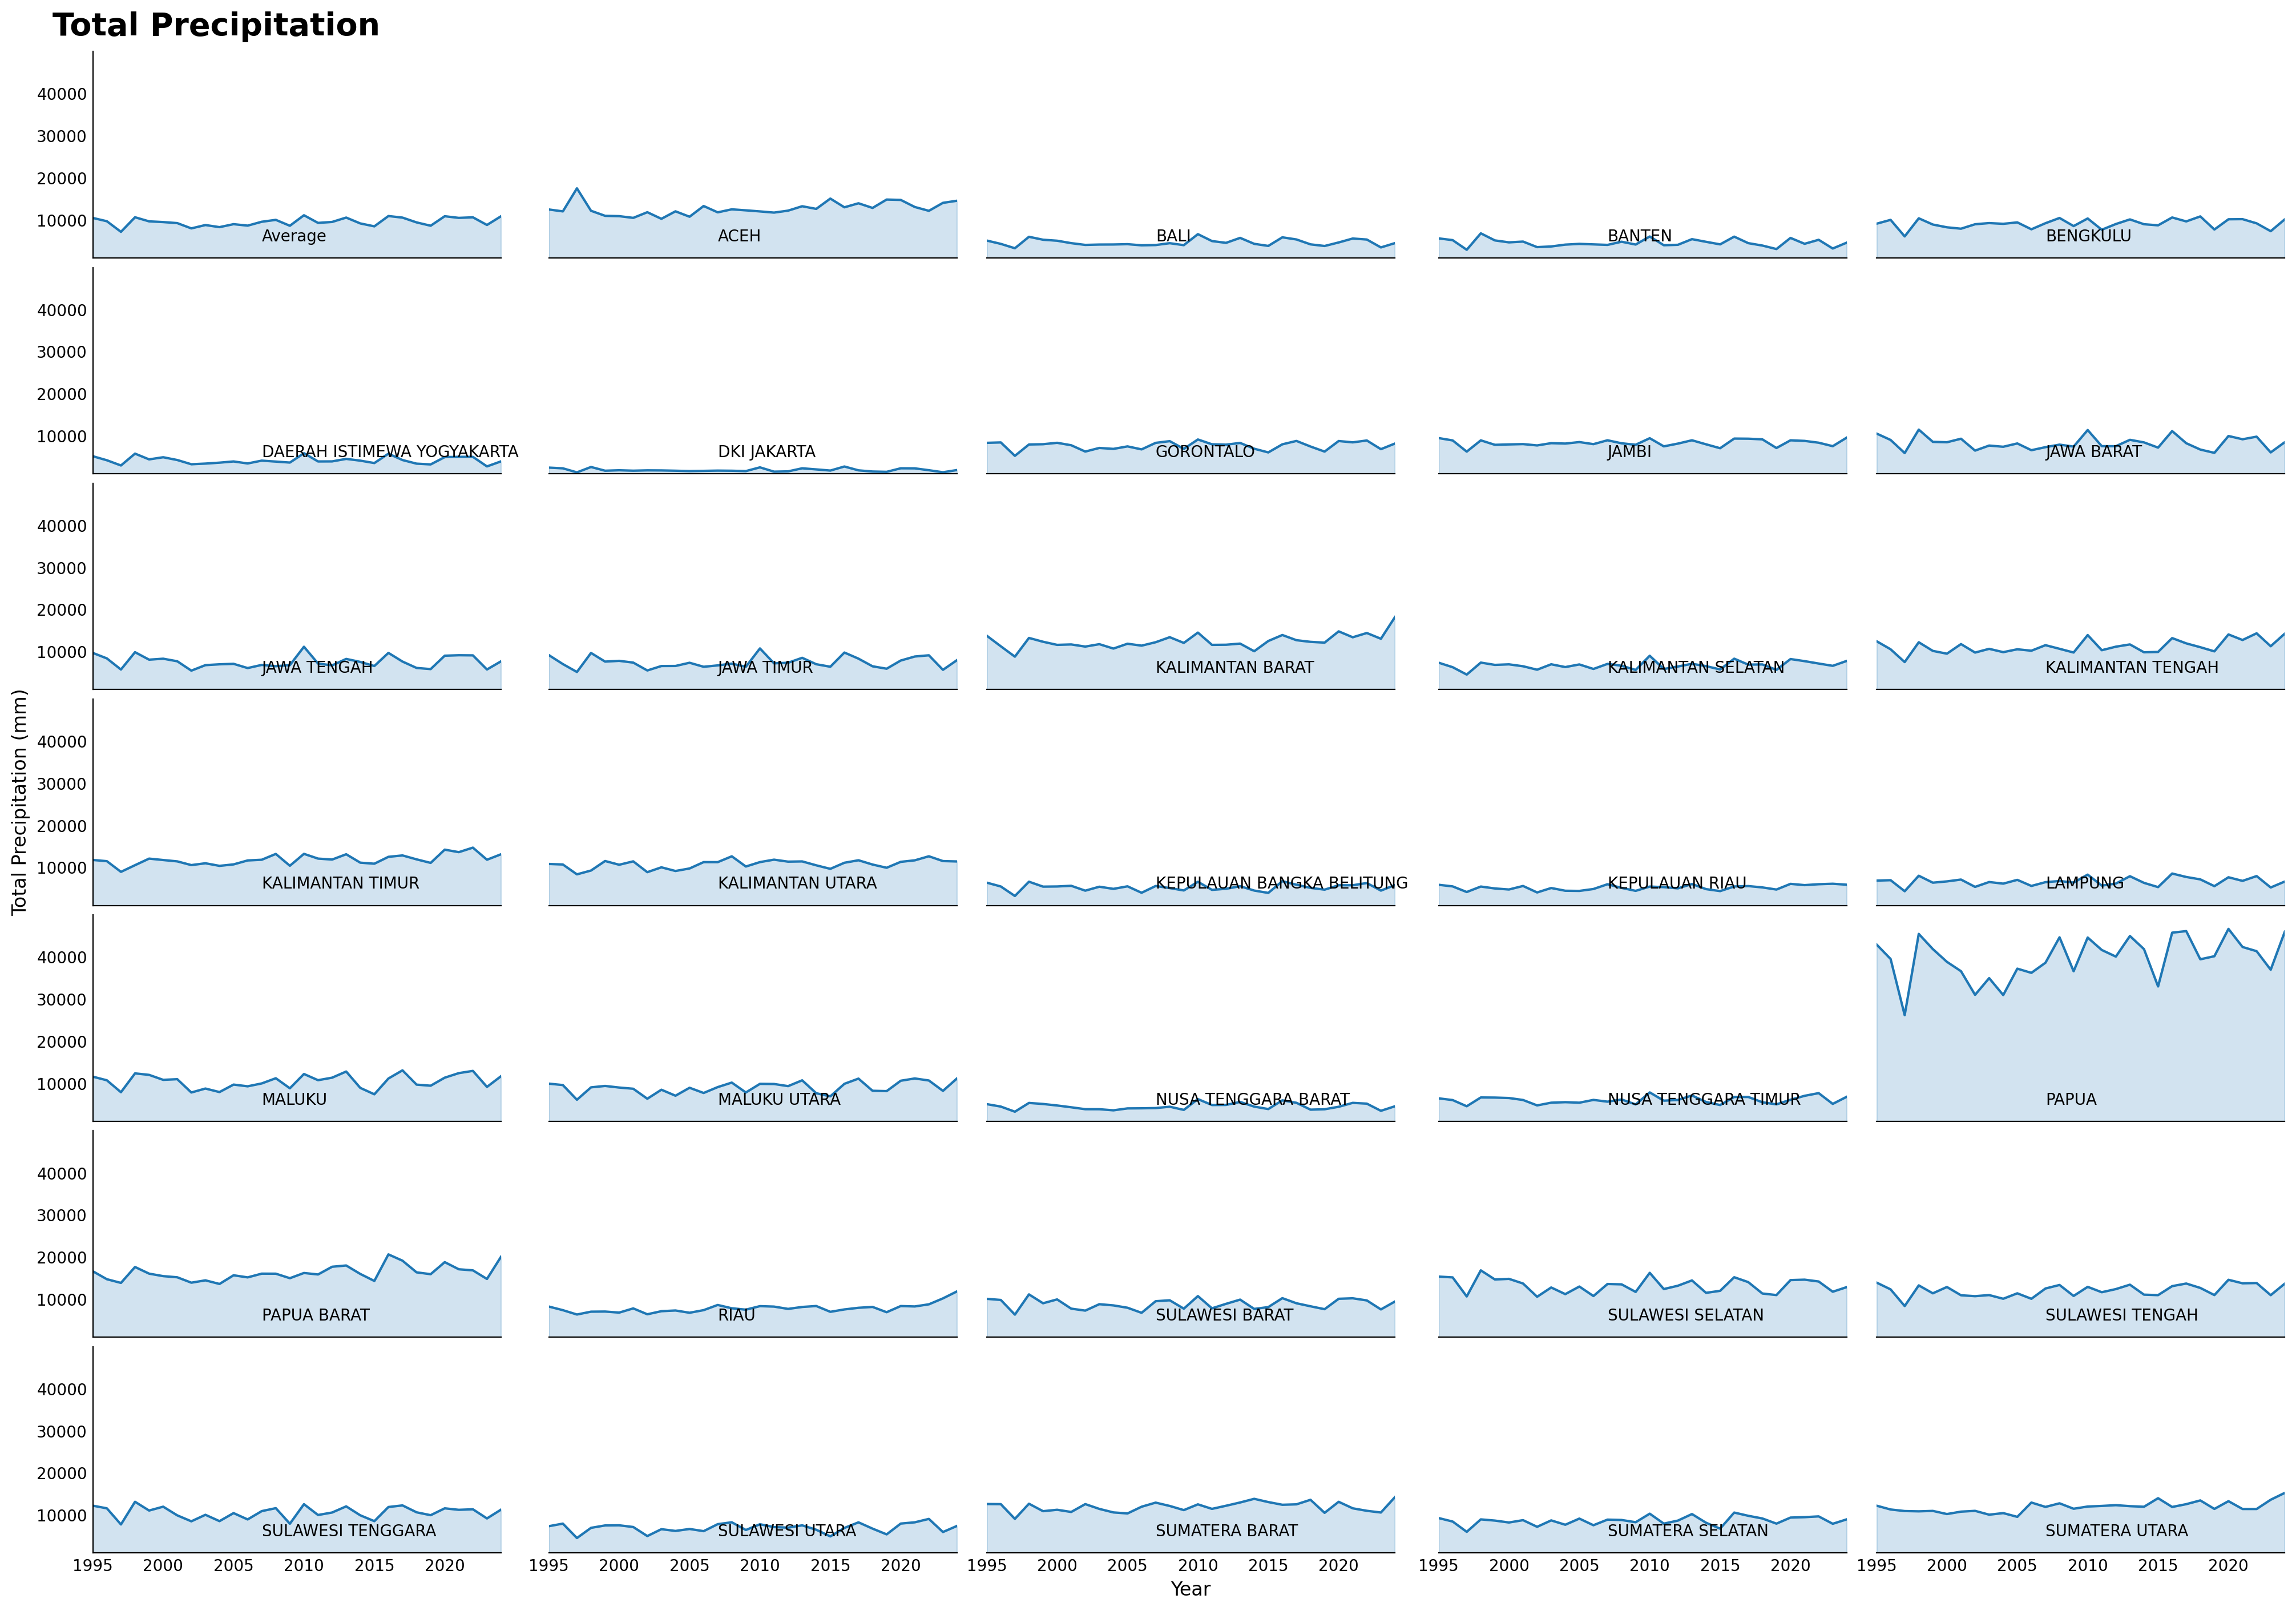

C:\Users\binta\AppData\Local\Temp\ipykernel_15932\3327142889.py:61: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.savefig(rf'C:\Users\binta\Downloads\Agroclimate\Hazard\Hazard_{fname}_MaxPRCP.png', dpi=200, bbox_inches='tight')
C:\Users\binta\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.canvas.print_figure(bytes_io, **kw)


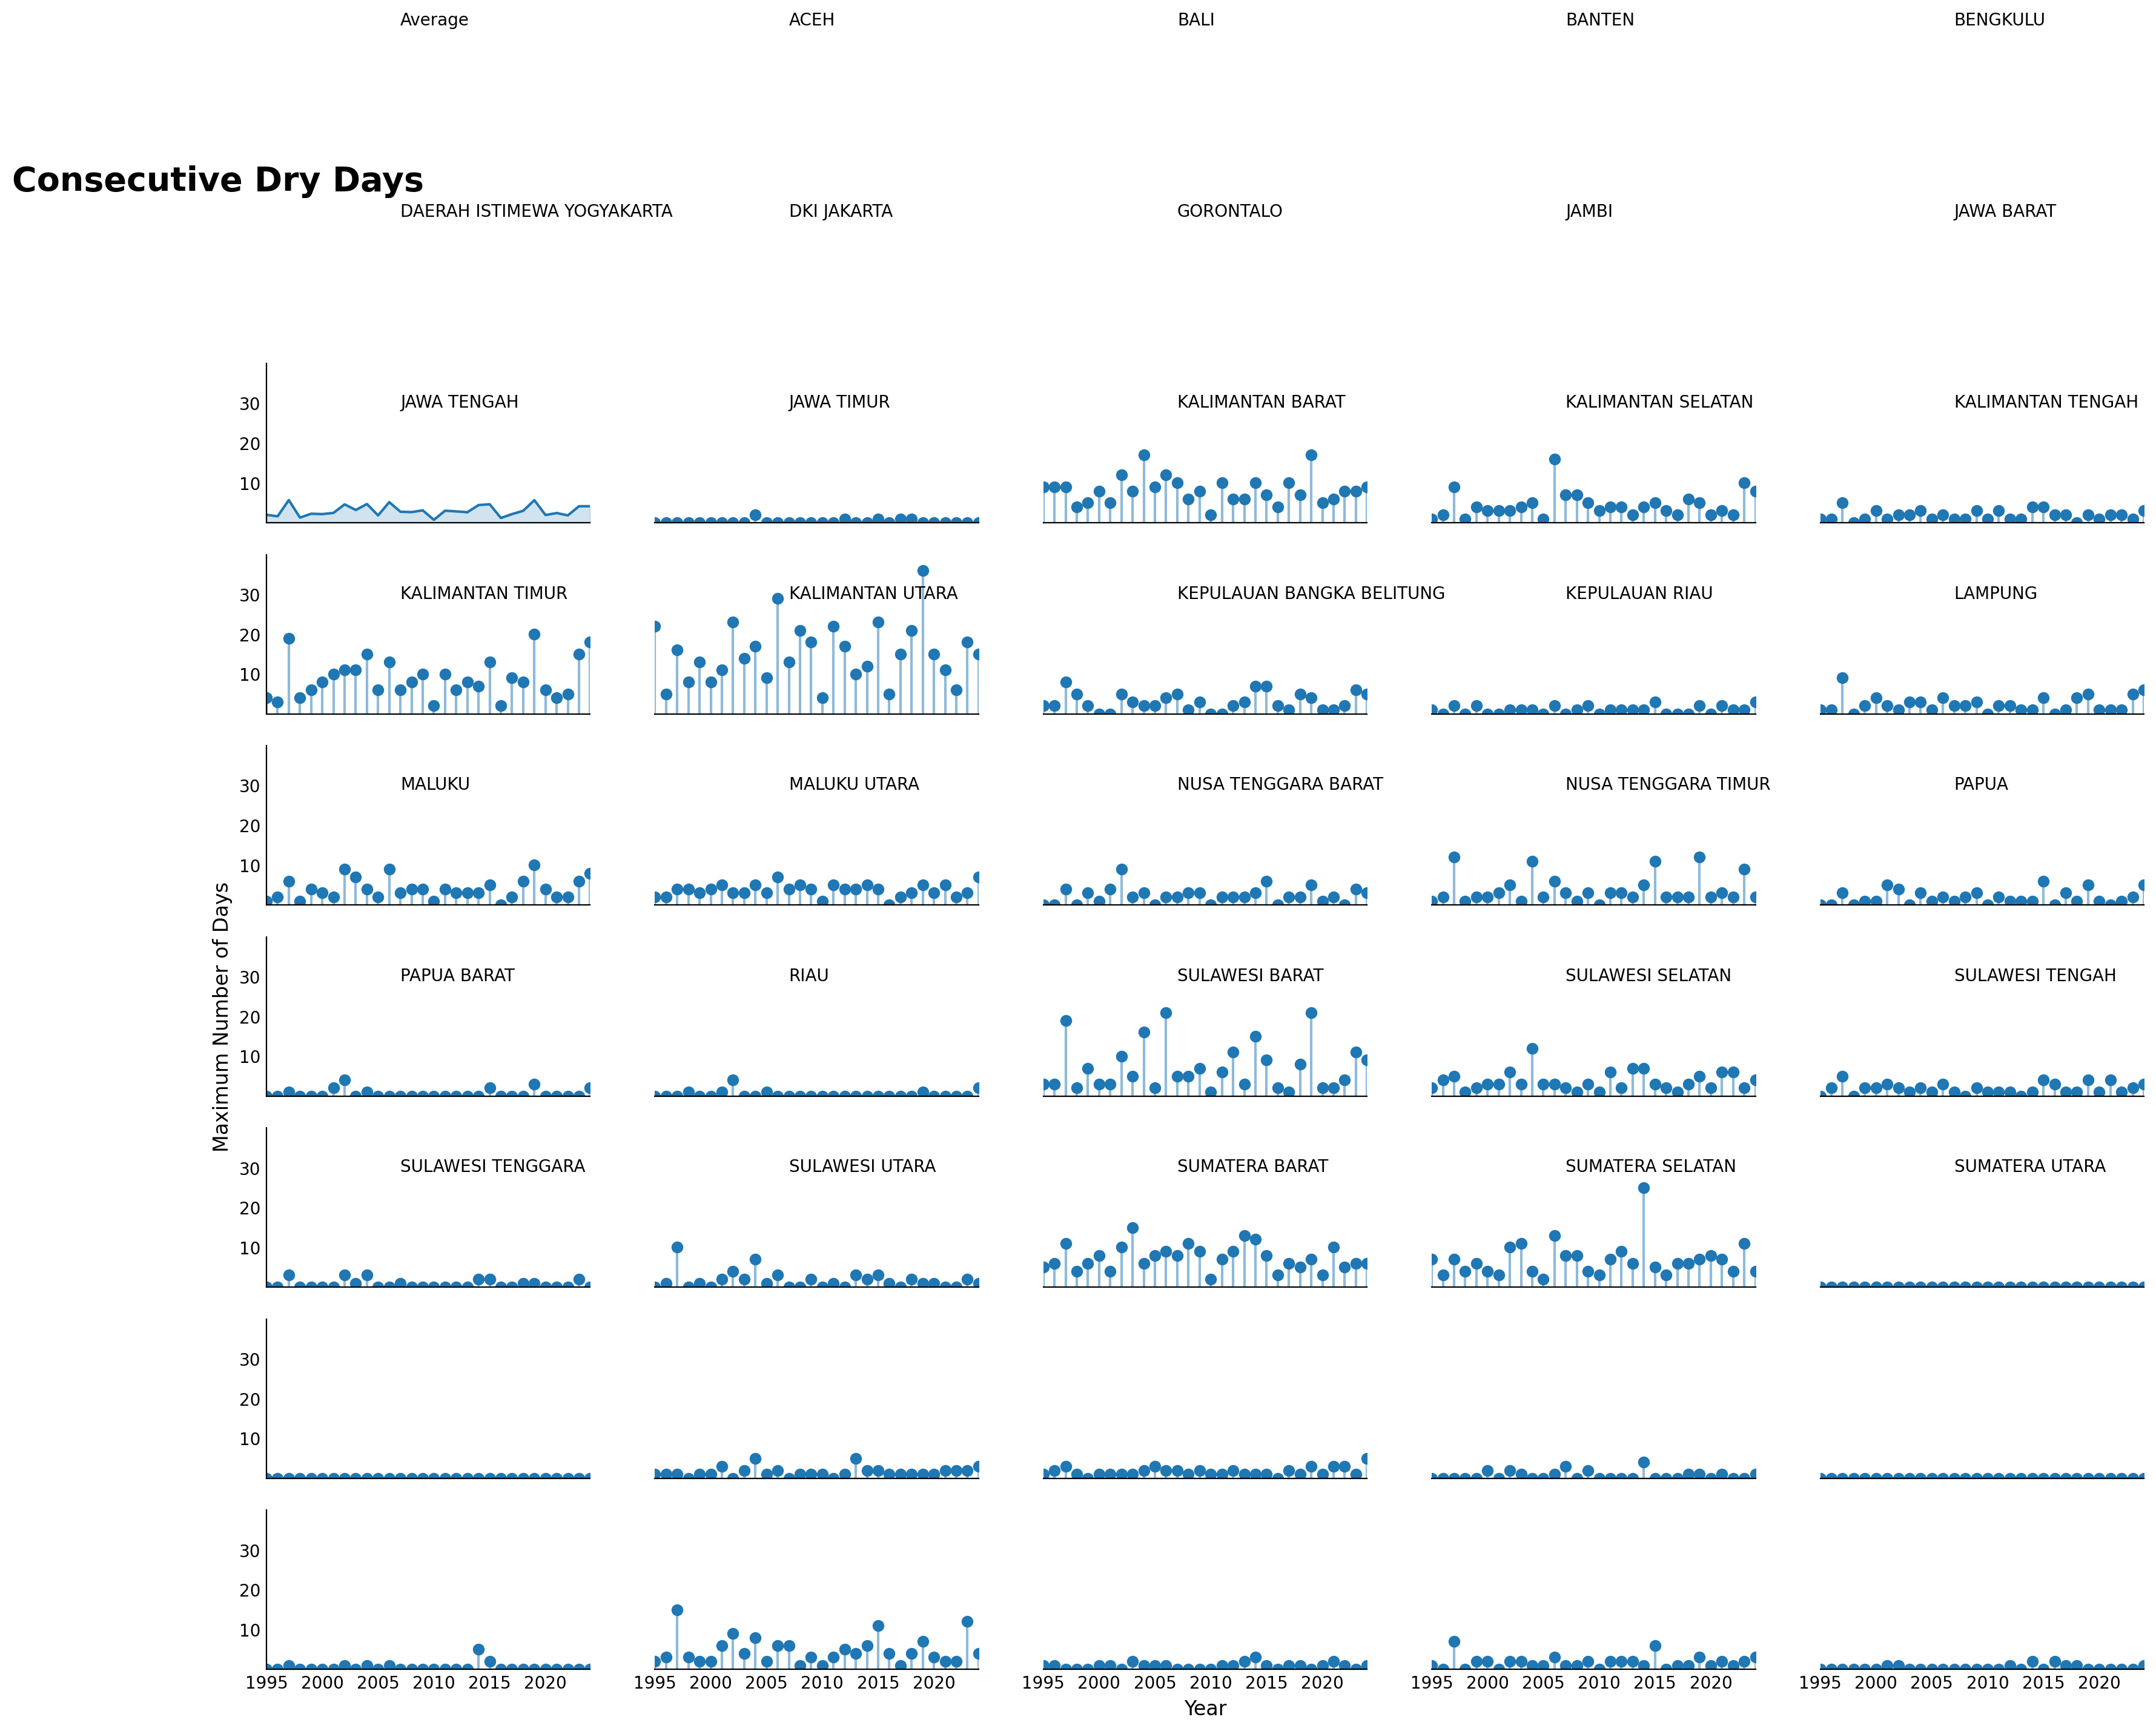

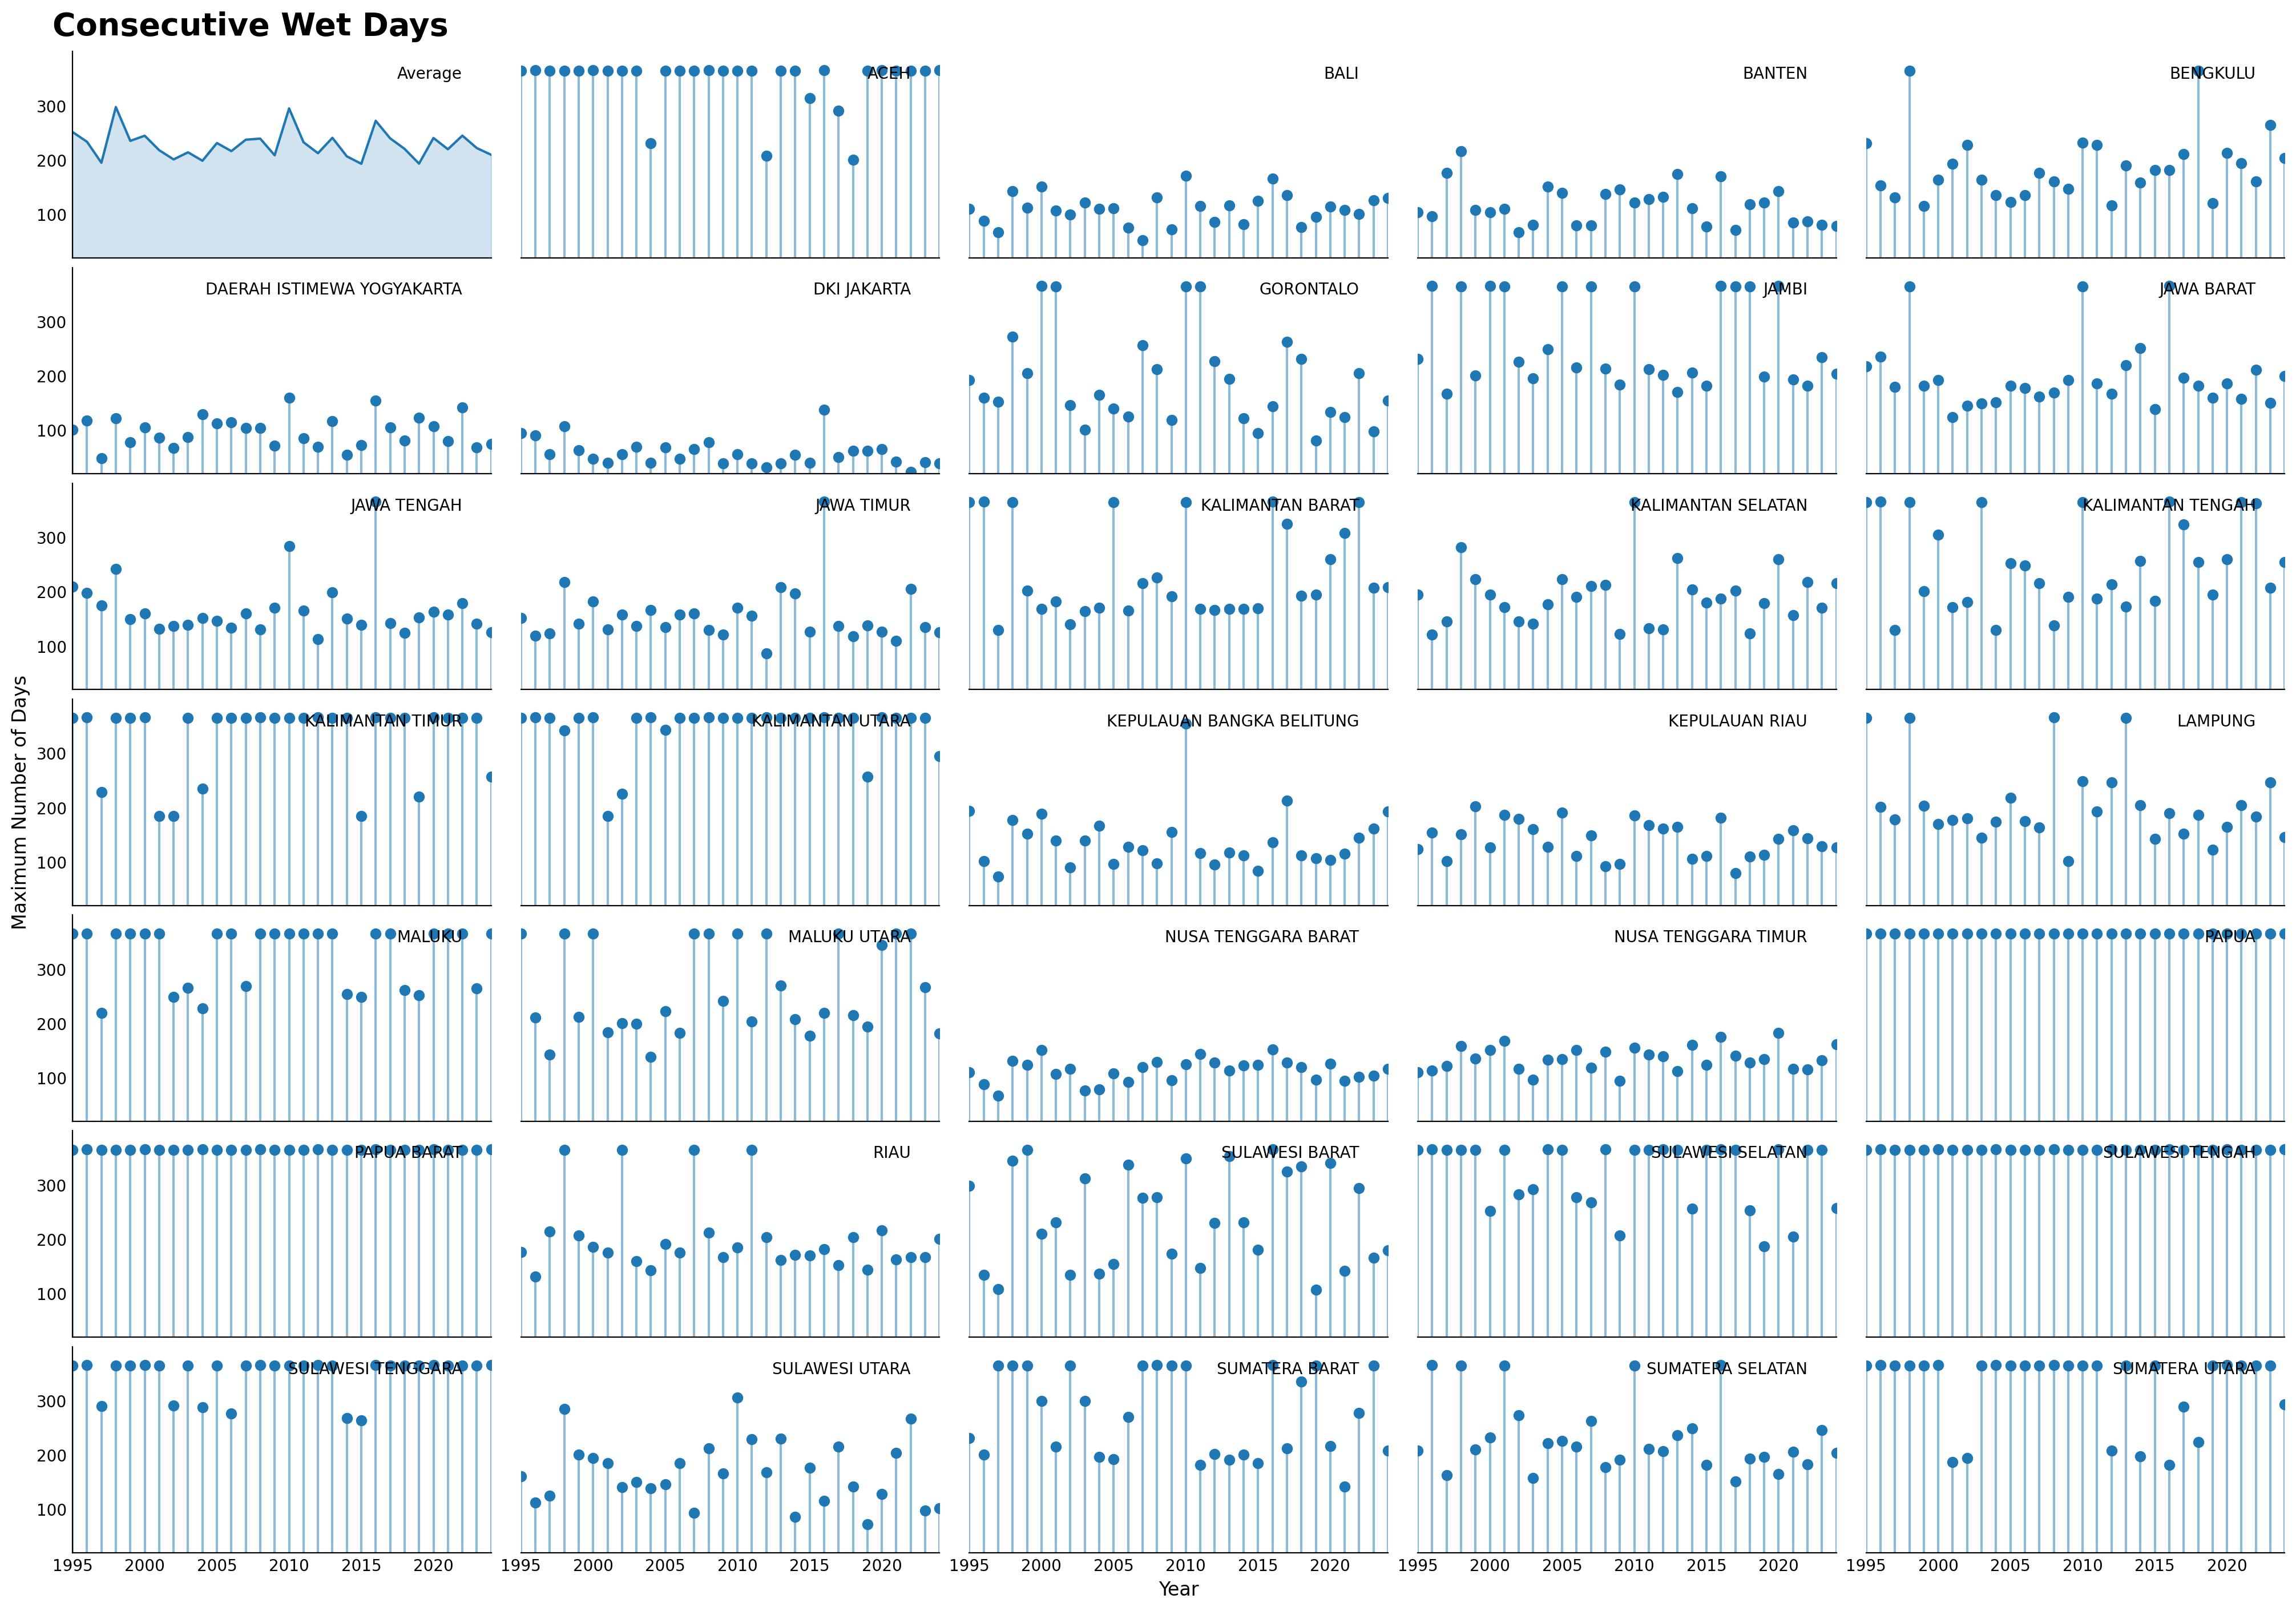

In [ ]:
dat = prcp_data.copy()
avg_idn = dat.groupby(['year'])[[col for col in dat.columns if col not in ['year', 'province']]].mean().reset_index()

for col in dat.columns:
    if col not in ['year', 'province']:

        fig, ax = plt.subplots(figsize=(20, 14), dpi=200, constrained_layout=True, 
                            nrows=7, ncols=5, sharex=True, sharey=True)
        ax = ax.flatten()

        ylim = vis_config[col]['ylim']
        yticks = vis_config[col]['yticks']
        ylabel = vis_config[col]['ylabel']
        pos = vis_config[col]['text_pos']
        title = vis_config[col]['title']

        if abs(np.diff([pos[0], 2005])[0]) > 10:
            ha = 'right'
        else:
            ha = 'left'

        for i, p in enumerate(provinces):

            mask = (dat['province'] == p)
            subset = dat.loc[mask, ['year', col]]

            if col in ['cwd', 'cdd']:
                ax[i+1].plot(subset.year, subset[col], 'o', color='tab:blue')
                ax[i+1].vlines(subset.year, ymin=0, ymax=subset[col], color='tab:blue', alpha=0.5)
            else:
                ax[i+1].plot(subset.year, subset[col], color='tab:blue')
                ax[i+1].fill_between(subset.year, subset[col], color='tab:blue', alpha=0.2)

            ax[i+1].text(pos[0], pos[1], p, ha=ha)
            # print(f'{i+1}', end=' | ')

        # indonesia average
        ax[0].plot(avg_idn.year, avg_idn[col], color='tab:blue')
        ax[0].fill_between(avg_idn.year, avg_idn[col], color='tab:blue', alpha=0.2)
        ax[0].text(pos[0], pos[1], 'Average', ha=ha)

        for i in range(35):
            
            ax[i].set_ylim(ylim)
            ax[i].set_yticks(yticks)

            ax[i].set_xlim([1995, 2024])
            # ax[i].set_xticks([2005, 2010, 2015, 2020])

            ax[i].spines['top'].set_visible(False)
            ax[i].spines['right'].set_visible(False)
            ax[i].tick_params(axis='both', which='both', length=0)
            if i not in [0, 5, 10, 15, 20, 25, 30]:
                ax[i].spines['left'].set_visible(False)

        ax[32].set_xlabel('Year', fontsize=12)
        ax[15].set_ylabel(ylabel, fontsize=12)
        fname = str(col).upper()
        fig.suptitle(title, fontweight='bold', fontsize=20, ha='left', x=0.02)
        
        fig.savefig(r'result\Hazard_{fname}_MaxPRCP.png', dpi=200, bbox_inches='tight')
        plt.show()